In [18]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [19]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [20]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [21]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [22]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

In [23]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20451


In [24]:
# Define the target cks values with quotes
target_cks = [
    'CK_Positions of the Zenith', 
    'CK_Four Solstices', 
]

# Filter the DataFrame for matching cks values
filtered_df = df_exploded[df_exploded['cks'].isin(target_cks)]
filtered_df

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
84,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00930,CK_Four Solstices,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1490,nan
156,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00930,CK_Four Solstices,http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,1926,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1491,nan
289,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00851,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/b63...,1626,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1494,nan
293,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02135,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/b63...,1626,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1494,nan
301,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01095,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/b63...,1626,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1494,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
27039,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01034,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/424...,2264,http://sphaera.mpiwg-berlin.mpg.de/id/part/078...,Strigel's treatise on the Sphere,"Original Part, Content",779,Leipzig,1564,nan
27040,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00455,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/424...,2264,http://sphaera.mpiwg-berlin.mpg.de/id/part/078...,Strigel's treatise on the Sphere,"Original Part, Content",779,Leipzig,1564,nan
27262,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_00155,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/921...,2277,http://sphaera.mpiwg-berlin.mpg.de/id/part/bfb...,La Sphere des deux mondes,"Original Part, Content",919,Antwerp,1555,nan
27309,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01613,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/921...,2277,http://sphaera.mpiwg-berlin.mpg.de/id/part/bfb...,La Sphere des deux mondes,"Original Part, Content",919,Antwerp,1555,nan


In [25]:
# Count unique values in the specified column
unique_count = filtered_df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 1085


In [26]:
# Count unique images associated with each cks value
unique_images_per_cks = filtered_df.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique images associated with each cks value:
cks
CK_Four Solstices               40
CK_Positions of the Zenith    1045
Name: images, dtype: int64


C:\Users\nogas\AppData\Local\Temp\ipykernel_23280\4097286650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_23280\4097286650.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_23280\4097286650.py:19: FutureWarning: The default of observed=False is deprecated and will be

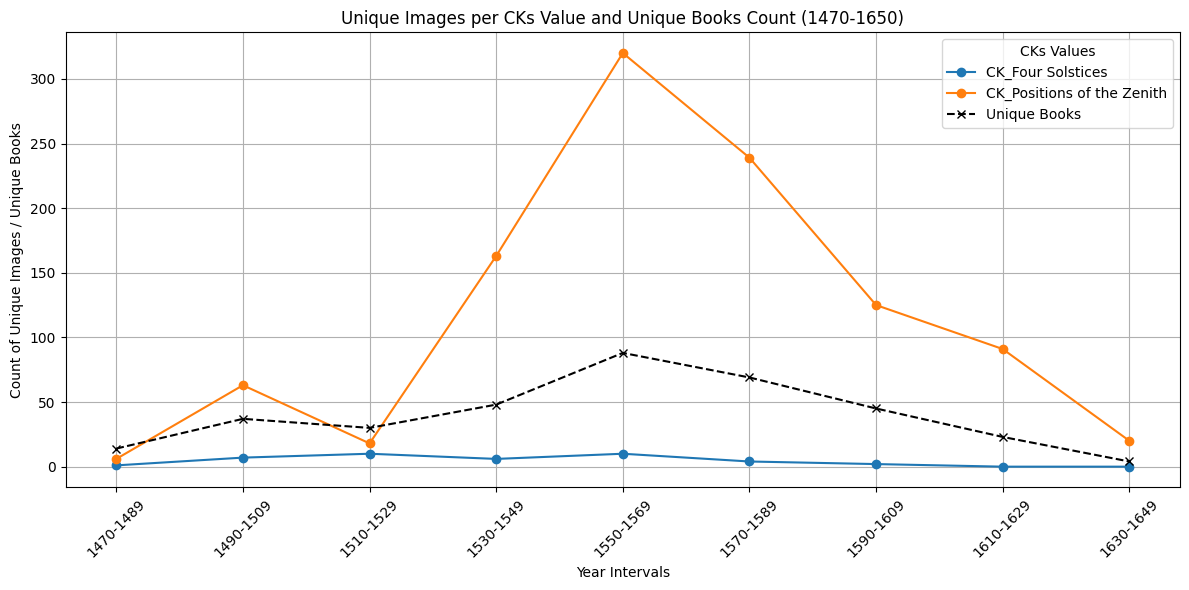

In [27]:
# Ensure the year columns are of integer type
filtered_df['year'] = filtered_df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the filtered_df DataFrame
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images in each interval for each unique cks value
unique_images_count = (filtered_df.groupby(['interval', 'cks'])['images']
                       .nunique().unstack(fill_value=0))

# Count unique books in each interval
unique_books_count = books.groupby('interval')['book'].nunique()  # Assuming 'title' is the column with book names

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting unique images for each cks value
for cks_value in unique_images_count.columns:
    plt.plot(unique_images_count.index, unique_images_count[cks_value], marker='o', label=cks_value)

# Plot unique books counts as a line
plt.plot(unique_books_count.index, unique_books_count.values, marker='x', color='black', linestyle='--', label='Unique Books')

# Customize the plot
plt.title('Unique Images per CKs Value and Unique Books Count (1470-1650)')
plt.xlabel('Year Intervals')
plt.ylabel('Count of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='CKs Values')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_23280\3849230900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_23280\3849230900.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_23280\3849230900.py:19: FutureWarning: The default of observed=False is deprecated and will be

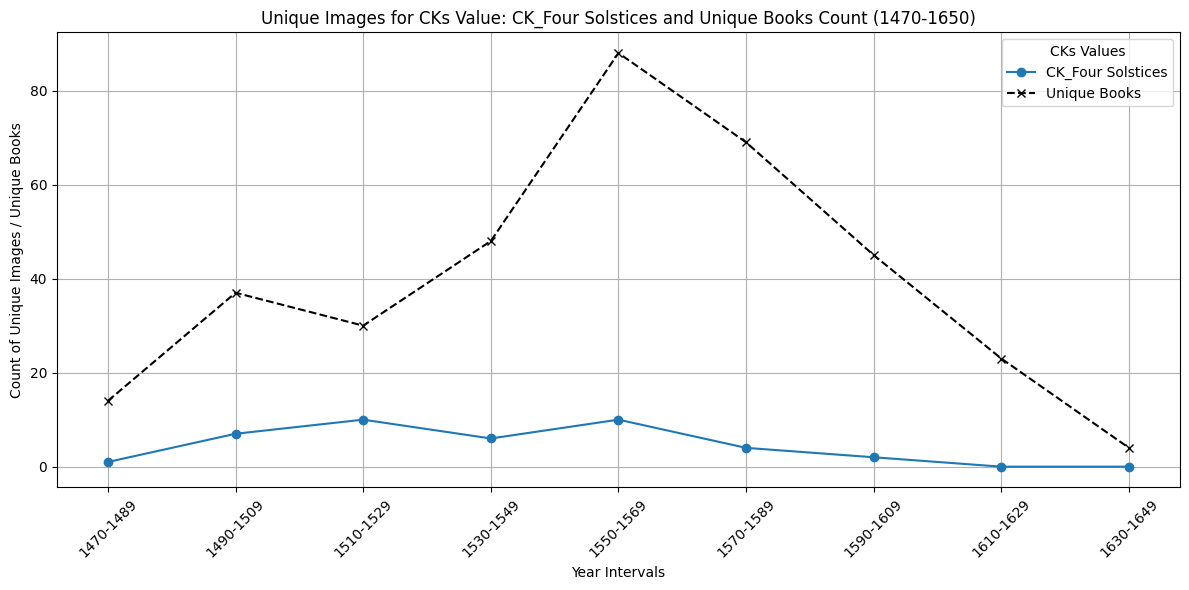

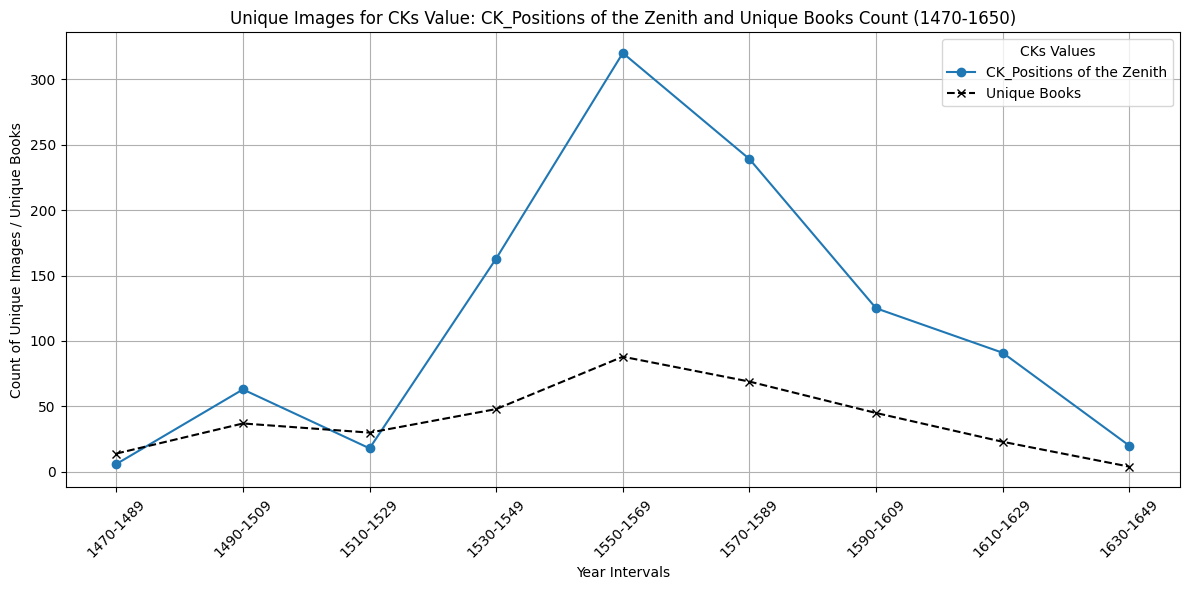

In [28]:
# Ensure the year columns are of integer type
filtered_df['year'] = filtered_df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the filtered_df DataFrame
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images in each interval for each unique cks value
unique_images_count = (filtered_df.groupby(['interval', 'cks'])['images']
                       .nunique().unstack(fill_value=0))

# Count unique books in each interval
unique_books_count = books.groupby('interval')['book'].nunique()  # Assuming 'book' is the column with book names

# Loop through each unique cks value and create a separate plot
for cks_value in unique_images_count.columns:
    plt.figure(figsize=(12, 6))
    
    # Plotting unique images for the current cks value
    plt.plot(unique_images_count.index, unique_images_count[cks_value], marker='o', label=cks_value)

    # Plot unique books counts as a line
    plt.plot(unique_books_count.index, unique_books_count.values, marker='x', color='black', linestyle='--', label='Unique Books')

    # Customize the plot
    plt.title(f'Unique Images for CKs Value: {cks_value} and Unique Books Count (1470-1650)')
    plt.xlabel('Year Intervals')
    plt.ylabel('Count of Unique Images / Unique Books')
    plt.xticks(rotation=45)
    plt.legend(title='CKs Values')
    plt.grid()

    # Show the plot
    plt.tight_layout()
    plt.show()

In [29]:
#output cluster names from filtered_df and create an excel file for visual tagging

# Get unique cluster_name values
#unique_cluster_names = filtered_df['cluster_name'].unique()

# Create a DataFrame from the unique values
#unique_cluster_names_df = pd.DataFrame(unique_cluster_names, columns=['cluster_name'])

# Define the output Excel file name
#output_file = 'zentih_shadows.xlsx'

# Write the DataFrame to an Excel file
#unique_cluster_names_df.to_excel(output_file, index=False)

In [30]:
#combine with visual data

# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\zentih_shadows.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

zentih_shadows_visual = pd.merge(filtered_df, excel_data, on='cluster_name', how='left')

zentih_shadows_visual

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag,interval,3D,color,double,decorated,face,human figures,material
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00930,CK_Four Solstices,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1490,nan,1490-1509,no,no,no,yes,yes,no,yes
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00930,CK_Four Solstices,http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,1926,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1491,nan,1490-1509,no,no,no,yes,yes,no,yes
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00851,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/b63...,1626,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1494,nan,1490-1509,no,no,yes,no,no,no,no
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_02135,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/b63...,1626,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1494,nan,1490-1509,no,no,yes,no,no,no,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01095,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/b63...,1626,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Original Part, Content",100,Leipzig,1494,nan,1490-1509,no,no,yes,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01034,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/424...,2264,http://sphaera.mpiwg-berlin.mpg.de/id/part/078...,Strigel's treatise on the Sphere,"Original Part, Content",779,Leipzig,1564,nan,1550-1569,no,yes,no,no,no,no,no
1081,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00455,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/424...,2264,http://sphaera.mpiwg-berlin.mpg.de/id/part/078...,Strigel's treatise on the Sphere,"Original Part, Content",779,Leipzig,1564,nan,1550-1569,no,yes,no,no,no,no,no
1082,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_00155,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/921...,2277,http://sphaera.mpiwg-berlin.mpg.de/id/part/bfb...,La Sphere des deux mondes,"Original Part, Content",919,Antwerp,1555,nan,1550-1569,no,yes,no,no,no,no,no
1083,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01613,CK_Positions of the Zenith,http://sphaera.mpiwg-berlin.mpg.de/id/item/921...,2277,http://sphaera.mpiwg-berlin.mpg.de/id/part/bfb...,La Sphere des deux mondes,"Original Part, Content",919,Antwerp,1555,nan,1550-1569,no,yes,no,no,no,no,no


In [31]:
#visual graphs

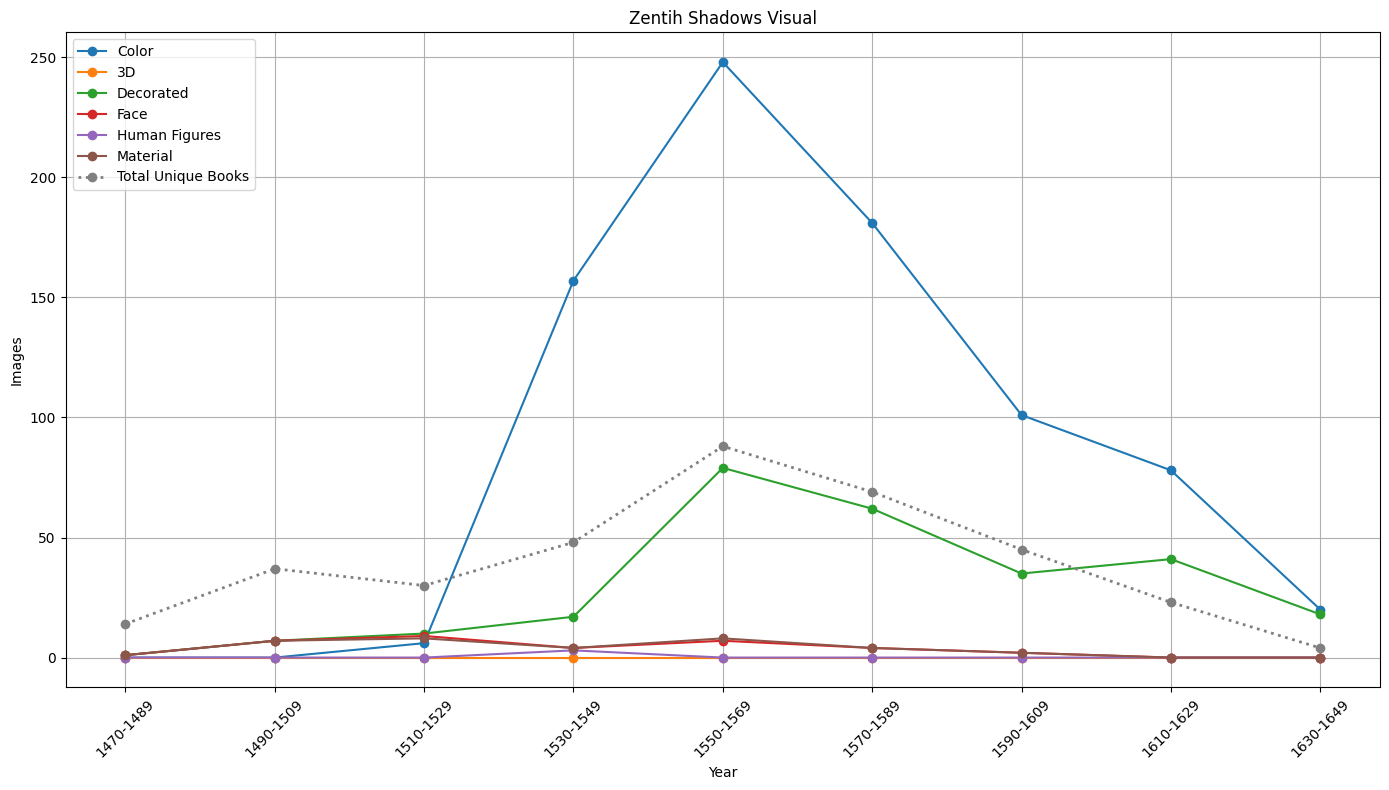

In [32]:
# Convert 'year' to int
zentih_shadows_visual['year'] = zentih_shadows_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
zentih_shadows_visual['interval'] = pd.cut(zentih_shadows_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = zentih_shadows_visual[zentih_shadows_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decorated = count_unique_images_by_column('decorated', 'yes')
face = count_unique_images_by_column('face', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material = count_unique_images_by_column('material', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    'Color': color,
    '3D': three_dimensions_effect,
    'Decorated': decorated,
    'Face': face,
    'Human Figures': human_figures,
    'Material': material,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = zentih_shadows_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Zentih Shadows Visual')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
# Create separate DataFrames for each cks value
df_four_solstices = zentih_shadows_visual[zentih_shadows_visual['cks'] == 'CK_Four Solstices']
df_positions_of_zenith = zentih_shadows_visual[zentih_shadows_visual['cks'] == 'CK_Positions of the Zenith']

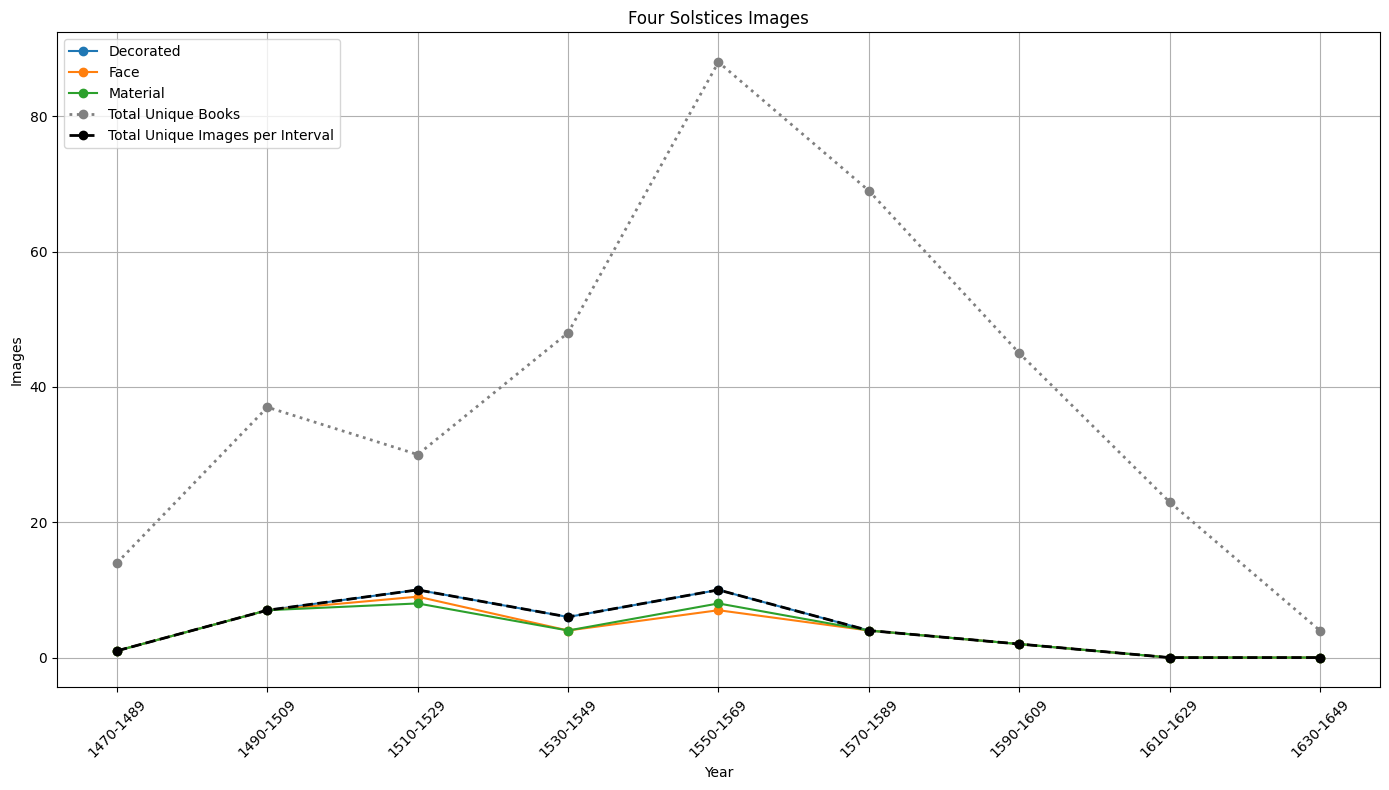

In [45]:
# Convert 'year' to int
df_four_solstices.loc[:, 'year'] = df_four_solstices['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_four_solstices.loc[:, 'interval'] = pd.cut(df_four_solstices['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = df_four_solstices[df_four_solstices[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decorated = count_unique_images_by_column('decorated', 'yes')
face = count_unique_images_by_column('face', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material = count_unique_images_by_column('material', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
#    'Color': color,
#    '3D': three_dimensions_effect,
    'Decorated': decorated,
    'Face': face,
#    'Human Figures': human_figures,
    'Material': material,
})

# Calculate total unique books for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for each interval in df_four_solstices
total_unique_images_per_interval = df_four_solstices.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images per interval
ax.plot(labels, total_unique_images_per_interval, marker='o', linestyle='--', color='black', label='Total Unique Images per Interval', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Four Solstices Images')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


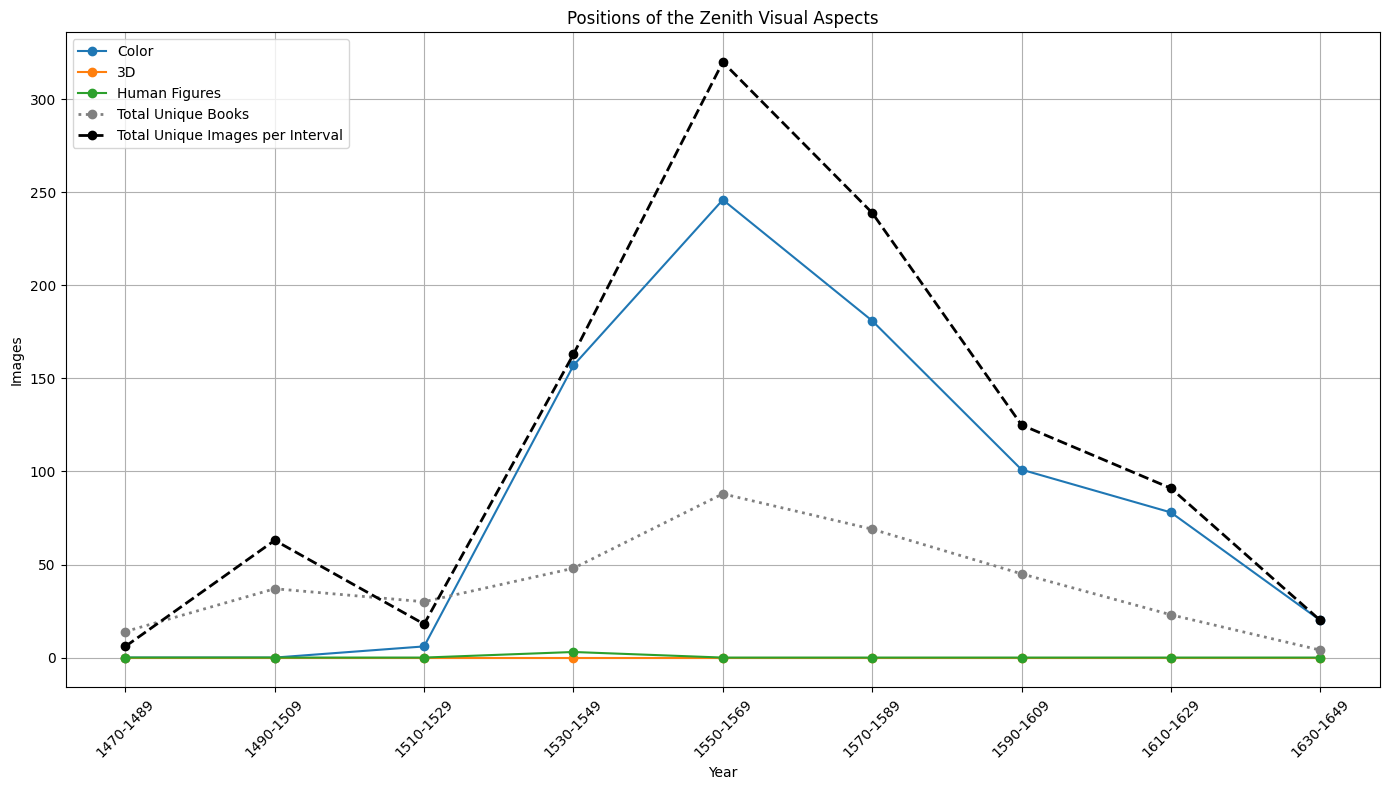

In [42]:
# Convert 'year' to int
df_positions_of_zenith.loc[:, 'year'] = df_positions_of_zenith['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_positions_of_zenith.loc[:, 'interval'] = pd.cut(df_positions_of_zenith['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = df_positions_of_zenith[df_positions_of_zenith[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decorated = count_unique_images_by_column('decorated', 'yes')
face = count_unique_images_by_column('face', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material = count_unique_images_by_column('material', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    'Color': color,
    '3D': three_dimensions_effect,
#    'Decorated': decorated,
#    'Face': face,
    'Human Figures': human_figures,
#    'Material': material,
})

# Calculate total unique books for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for each interval in df_four_solstices
total_unique_images_per_interval = df_positions_of_zenith.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Plot line for total unique images per interval
ax.plot(labels, total_unique_images_per_interval, marker='o', linestyle='--', color='black', label='Total Unique Images per Interval', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Positions of the Zenith Visual Aspects')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


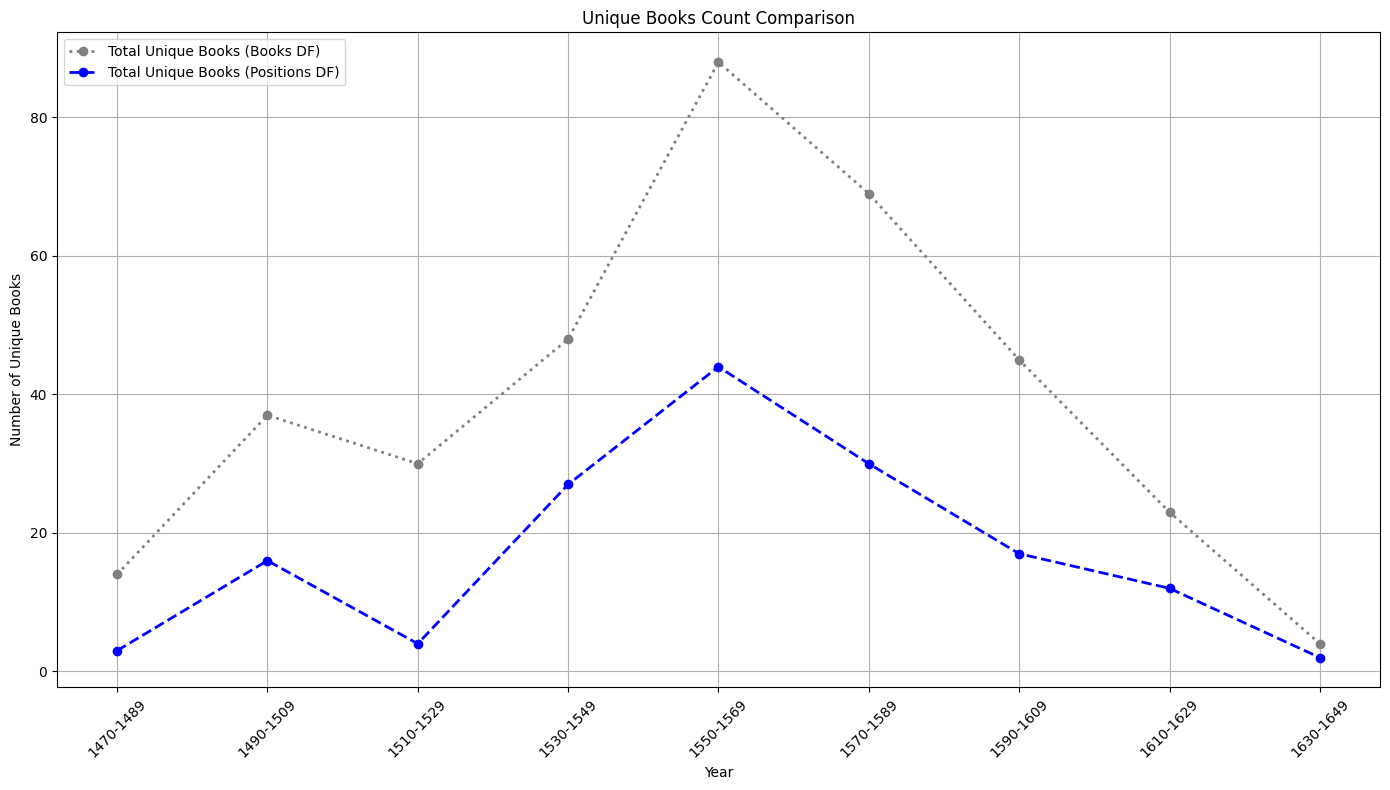

In [46]:
# Convert 'year' to int
df_positions_of_zenith.loc[:, 'year'] = df_positions_of_zenith['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_positions_of_zenith.loc[:, 'interval'] = pd.cut(df_positions_of_zenith['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Calculate total unique books for each interval from books DataFrame
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique books for each interval from df_positions_of_zenith
total_unique_books_positions_df = df_positions_of_zenith.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Plot lines for the two unique book counts
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for total unique books from books DataFrame
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Books DF)', linewidth=2)

# Plot lines for total unique books from df_positions_of_zenith
ax.plot(labels, total_unique_books_positions_df, marker='o', linestyle='--', color='blue', label='Total Unique Books (Positions DF)', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Books')
ax.set_title('Unique Books Count Comparison')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


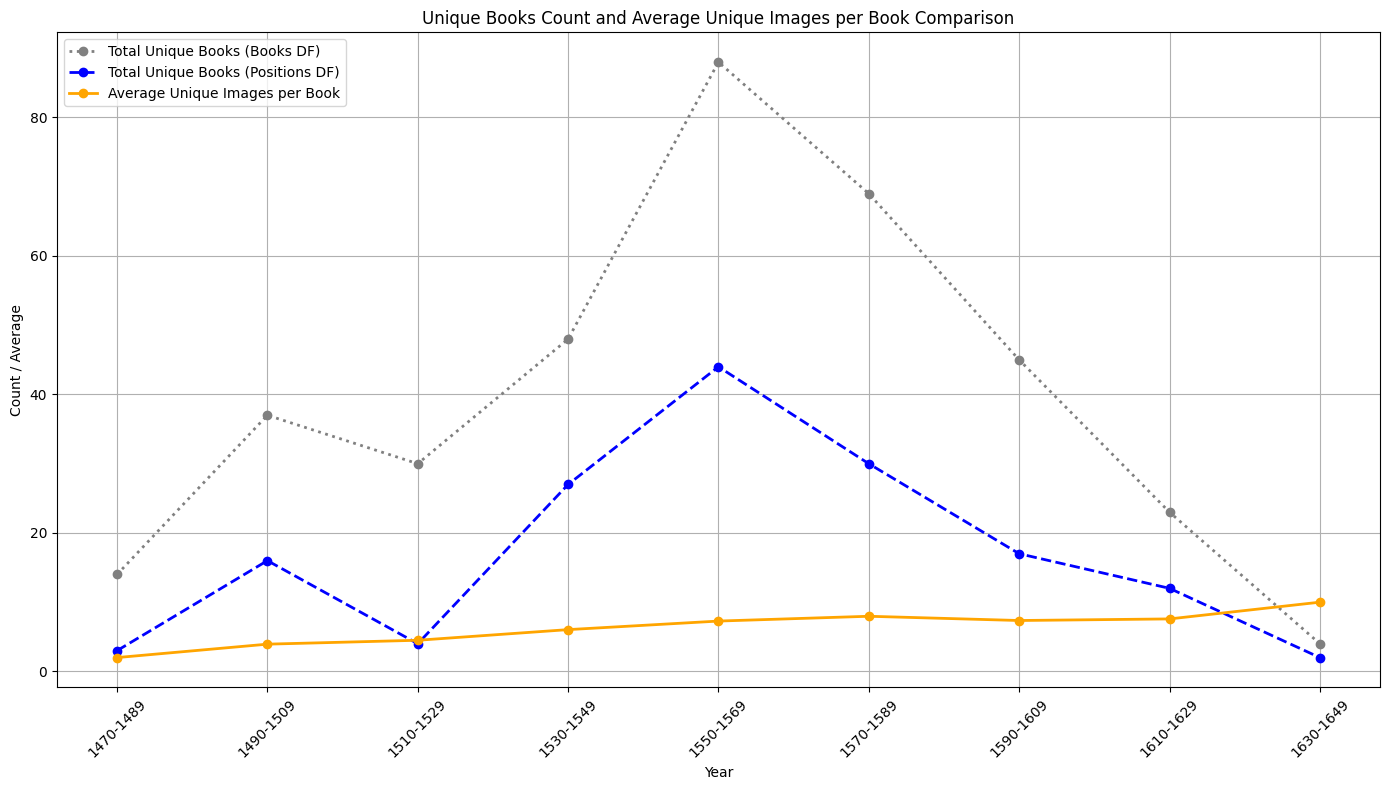

In [49]:
import numpy as np

# Convert 'year' to int
df_positions_of_zenith.loc[:, 'year'] = df_positions_of_zenith['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_positions_of_zenith.loc[:, 'interval'] = pd.cut(df_positions_of_zenith['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Calculate total unique books for each interval from books DataFrame
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique books for each interval from df_positions_of_zenith
total_unique_books_positions_df = df_positions_of_zenith.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for each interval in df_positions_of_zenith
total_unique_images_per_interval = df_positions_of_zenith.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Calculate average unique images per book for each interval
average_images_per_book = total_unique_images_per_interval / total_unique_books_positions_df.replace(0, np.nan)  # Avoid division by zero

# Plot lines for the two unique book counts and the average images per book
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for total unique books from books DataFrame
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Books DF)', linewidth=2)

# Plot lines for total unique books from df_positions_of_zenith
ax.plot(labels, total_unique_books_positions_df, marker='o', linestyle='--', color='blue', label='Total Unique Books (Positions DF)', linewidth=2)

# Plot line for average unique images per book
ax.plot(labels, average_images_per_book, marker='o', linestyle='-', color='orange', label='Average Unique Images per Book', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count / Average')
ax.set_title('Unique Books Count and Average Unique Images per Book Comparison')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


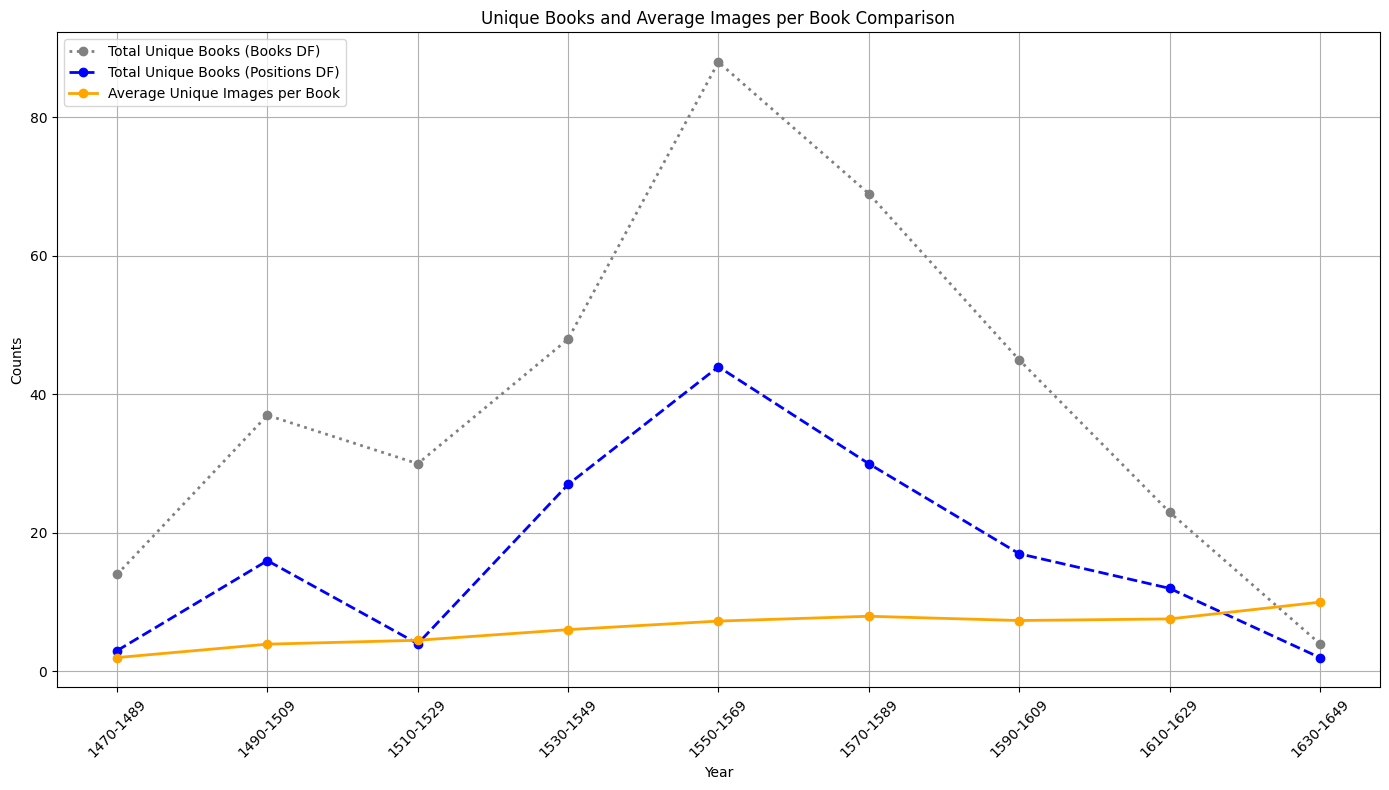

In [50]:
# Convert 'year' to int
df_positions_of_zenith.loc[:, 'year'] = df_positions_of_zenith['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_positions_of_zenith.loc[:, 'interval'] = pd.cut(df_positions_of_zenith['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Calculate total unique books for each interval from books DataFrame
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique books for each interval from df_positions_of_zenith
total_unique_books_positions_df = df_positions_of_zenith.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for each interval in df_positions_of_zenith
total_unique_images_per_interval = df_positions_of_zenith.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Calculate average unique images per book for each interval
average_images_per_book = total_unique_images_per_interval / total_unique_books_positions_df.replace(0, np.nan)  # Avoid division by zero

# Plot lines for the two unique book counts and the average
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for total unique books from books DataFrame
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Books DF)', linewidth=2)

# Plot lines for total unique books from df_positions_of_zenith
ax.plot(labels, total_unique_books_positions_df, marker='o', linestyle='--', color='blue', label='Total Unique Books (Positions DF)', linewidth=2)

# Plot line for average unique images per book
ax.plot(labels, average_images_per_book, marker='o', linestyle='-', color='orange', label='Average Unique Images per Book', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Counts')
ax.set_title('Unique Books and Average Images per Book Comparison')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


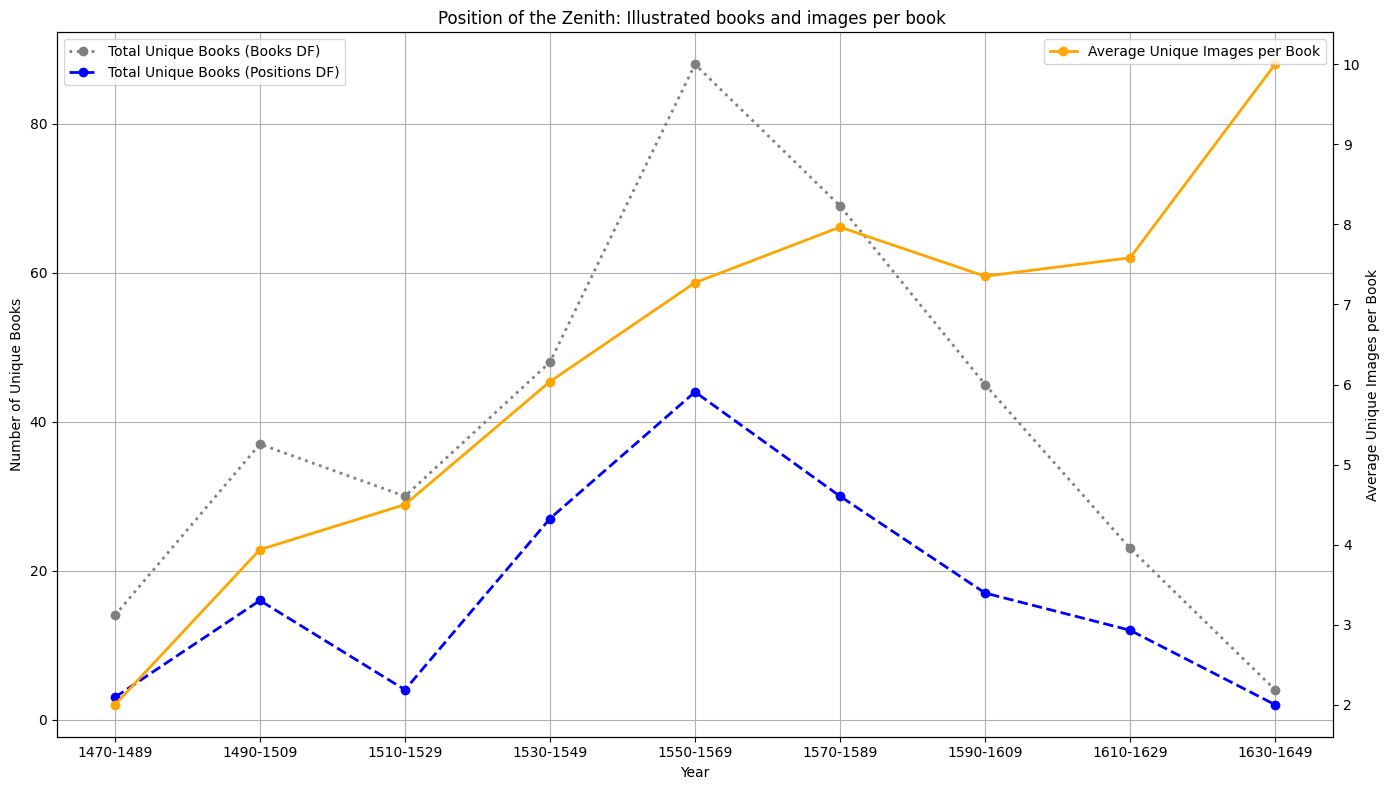

In [52]:
# Convert 'year' to int
df_positions_of_zenith.loc[:, 'year'] = df_positions_of_zenith['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
df_positions_of_zenith.loc[:, 'interval'] = pd.cut(df_positions_of_zenith['year'], bins=bins, labels=labels, right=False)
books.loc[:, 'interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Calculate total unique books for each interval from books DataFrame
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique books for each interval from df_positions_of_zenith
total_unique_books_positions_df = df_positions_of_zenith.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Calculate total unique images for each interval in df_positions_of_zenith
total_unique_images_per_interval = df_positions_of_zenith.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Calculate average unique images per book for each interval
average_images_per_book = total_unique_images_per_interval / total_unique_books_positions_df.replace(0, np.nan)  # Avoid division by zero

# Plot lines for the two unique book counts and the average
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for total unique books from books DataFrame
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Books DF)', linewidth=2)

# Plot lines for total unique books from df_positions_of_zenith
ax.plot(labels, total_unique_books_positions_df, marker='o', linestyle='--', color='blue', label='Total Unique Books (Positions DF)', linewidth=2)

# Create a secondary y-axis for the average images per book
ax2 = ax.twinx()  # Create a twin Axes sharing the x-axis

# Plot line for average unique images per book on the secondary y-axis
ax2.plot(labels, average_images_per_book, marker='o', linestyle='-', color='orange', label='Average Unique Images per Book', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Books')
ax2.set_ylabel('Average Unique Images per Book')
ax.set_title('Position of the Zenith: Illustrated books and images per book ')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

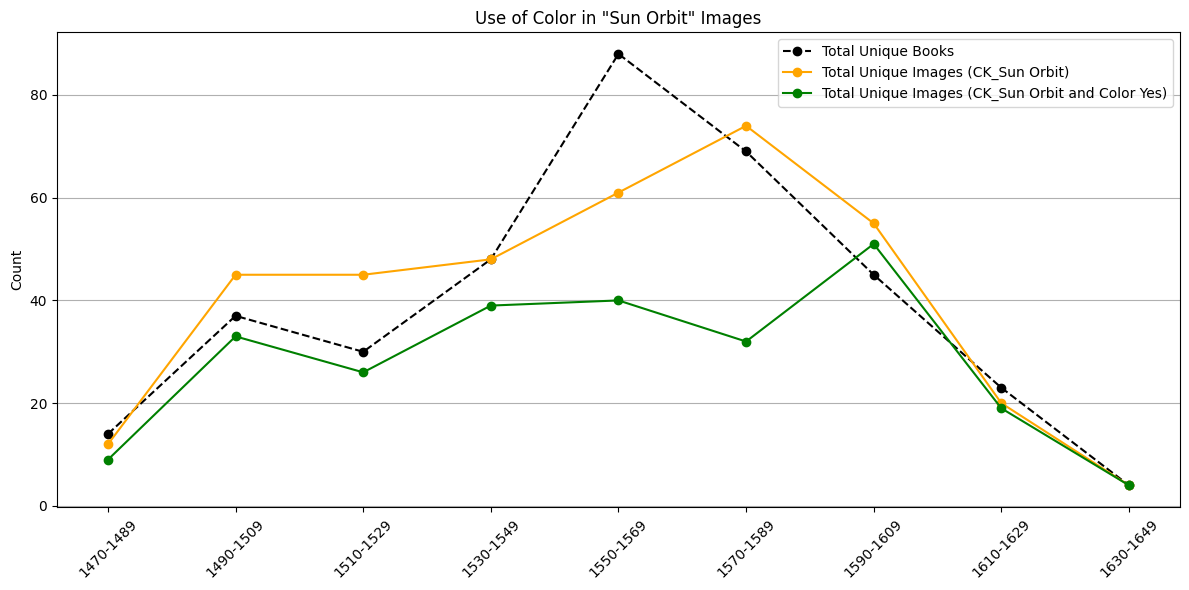

In [35]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'CK_Sun Orbit' per interval
unique_images_ck_sun_orbit = sun_motion_visual[sun_motion_visual['cks'].str.contains('CK_Sun Orbit', na=False)]
total_unique_images_ck_sun_orbit_per_interval = unique_images_ck_sun_orbit.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'CK_Sun Orbit' and 'color' as 'yes' per interval
unique_images_color_yes = unique_images_ck_sun_orbit[unique_images_ck_sun_orbit['color'] == 'yes']
total_unique_images_color_yes_per_interval = unique_images_color_yes.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Books': total_unique_books_per_interval,
    'Total Unique Images (CK_Sun Orbit)': total_unique_images_ck_sun_orbit_per_interval,
    'Total Unique Images (CK_Sun Orbit and Color Yes)': total_unique_images_color_yes_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='o', linestyle='--', color='black', label='Total Unique Books')  # Broken black line
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit and Color Yes)', color='green')

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Sun Orbit" Images')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


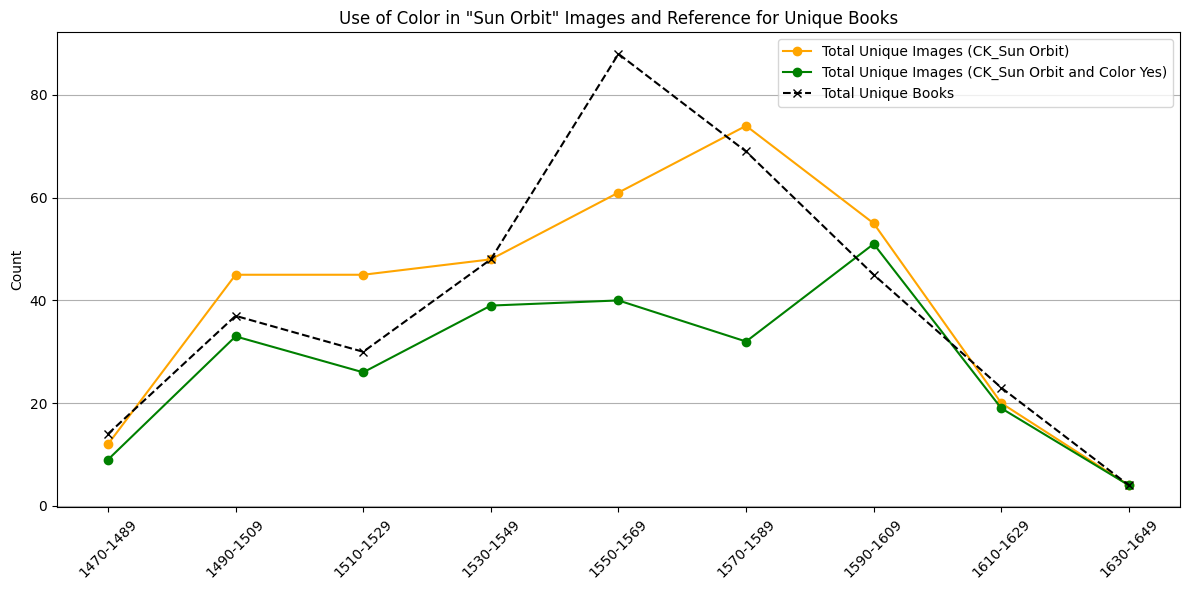

In [40]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Sun Orbit"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Sun Orbit']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'title' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Sun Orbit)': total_unique_images_per_interval,
    'Total Unique Images (CK_Sun Orbit and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Sun Orbit and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Sun Orbit and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Sun Orbit" Images and Reference for Unique Books')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

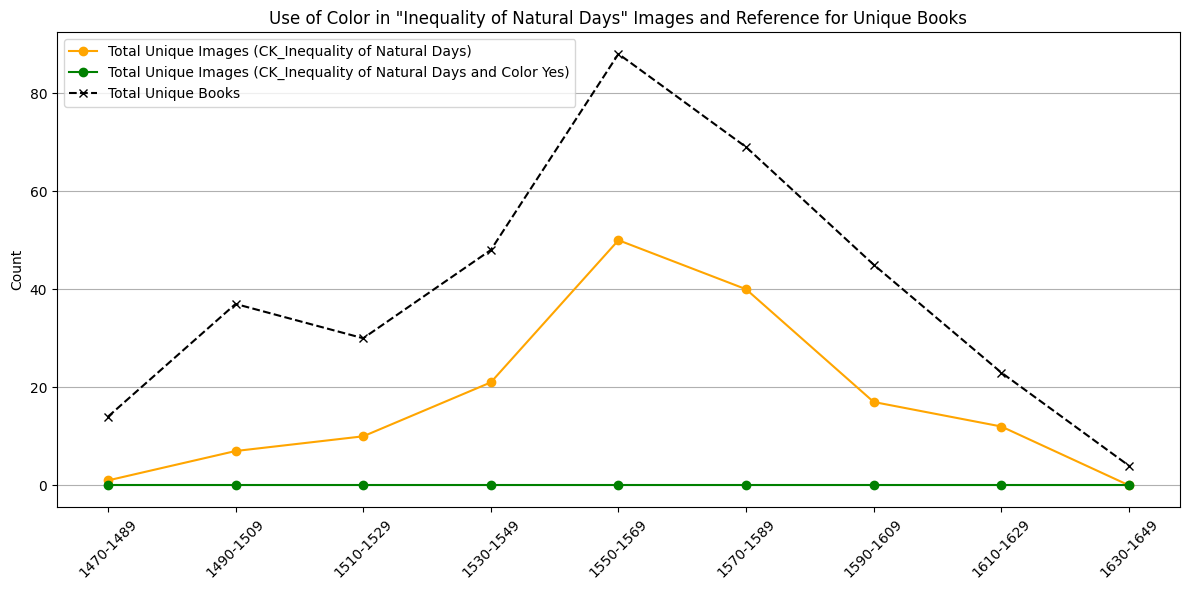

In [41]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Sun Orbit"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Inequality of Natural Days']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'title' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Inequality of Natural Days)': total_unique_images_per_interval,
    'Total Unique Images (CK_Inequality of Natural Days and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Inequality of Natural Days)'], marker='o', linestyle='-', label='Total Unique Images (CK_Inequality of Natural Days)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Inequality of Natural Days and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Inequality of Natural Days and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Inequality of Natural Days" Images and Reference for Unique Books')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

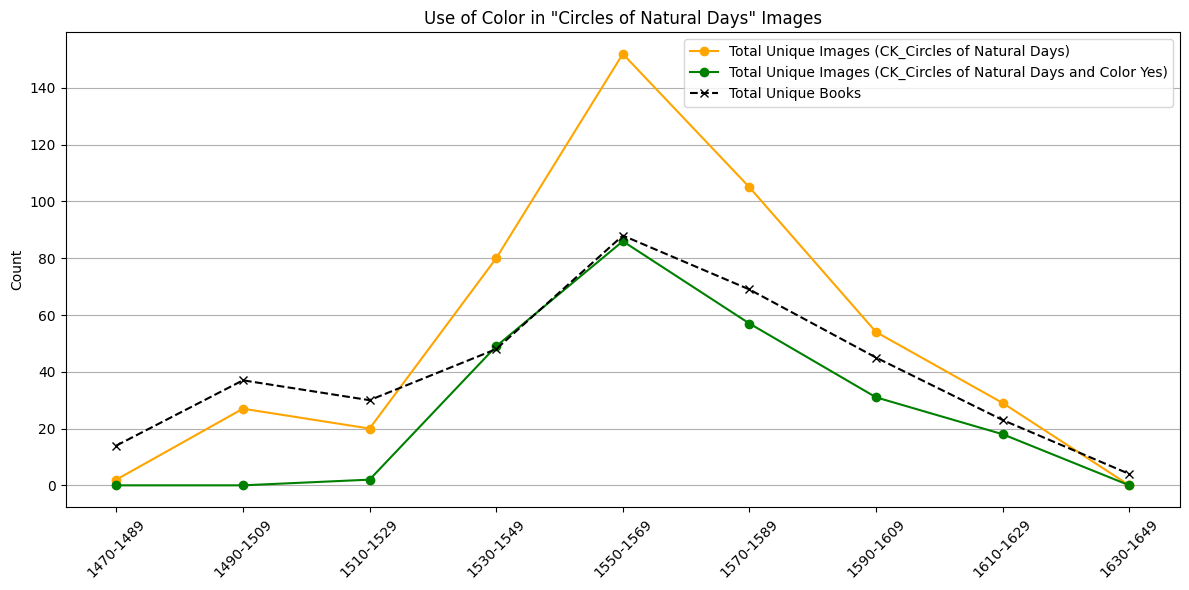

In [43]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Circles of Natural Days"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Circles of Natural Days']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'book' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Circles of Natural Days)': total_unique_images_per_interval,
    'Total Unique Images (CK_Circles of Natural Days and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Circles of Natural Days)'], marker='o', linestyle='-', label='Total Unique Images (CK_Circles of Natural Days)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Circles of Natural Days and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Circles of Natural Days and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Circles of Natural Days" Images')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

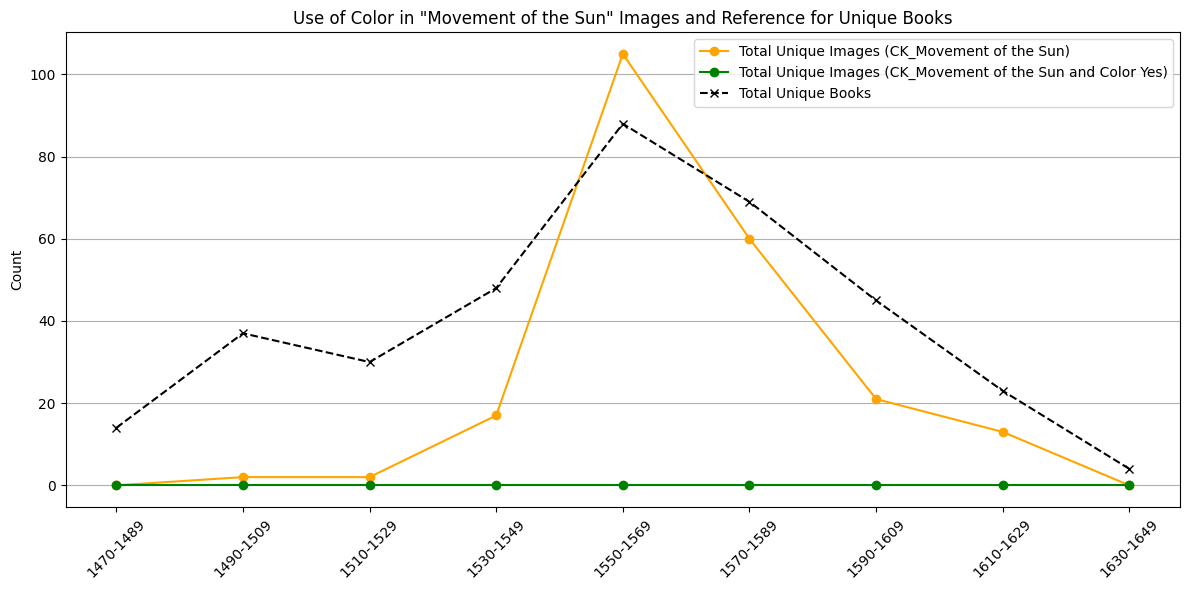

In [44]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Movement of the Sun"
filtered_sun_orbit = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Movement of the Sun']

# Count total unique images per interval
total_unique_images_per_interval = filtered_sun_orbit.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'color' as 'yes' per interval
total_unique_images_color_yes_per_interval = filtered_sun_orbit[filtered_sun_orbit['color'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'book' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Movement of the Sun)': total_unique_images_per_interval,
    'Total Unique Images (CK_Movement of the Sun and Color Yes)': total_unique_images_color_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Movement of the Sun)'], marker='o', linestyle='-', label='Total Unique Images (CK_Movement of the Sun)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Movement of the Sun and Color Yes)'], marker='o', linestyle='-', label='Total Unique Images (CK_Movement of the Sun and Color Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Use of Color in "Movement of the Sun" Images and Reference for Unique Books')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

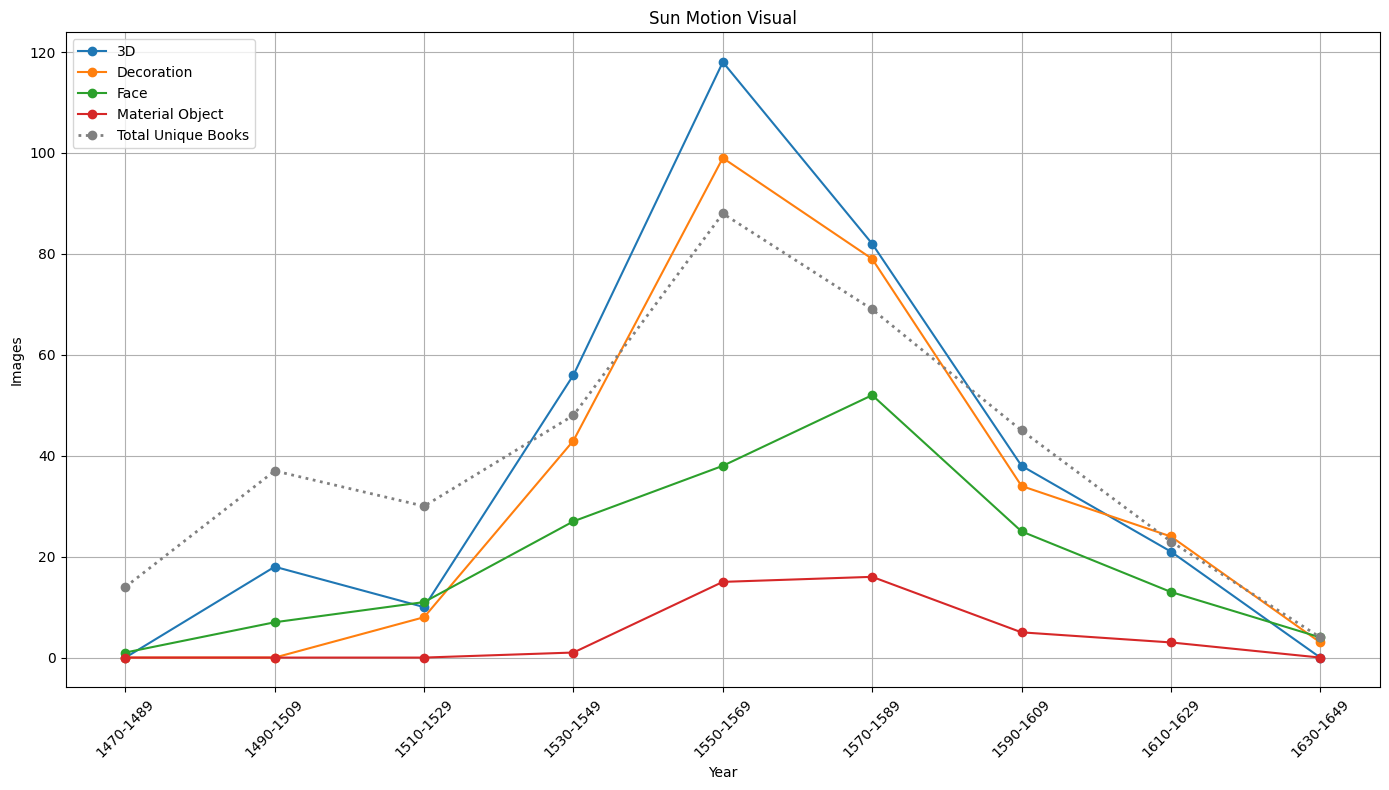

In [45]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = sun_motion_visual[sun_motion_visual[column_name] == value]
    return filtered_df.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
color = count_unique_images_by_column('color', 'yes')
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
decoration = count_unique_images_by_column('decoration', 'yes')
face = count_unique_images_by_column('face', 'yes')
multiple_moments = count_unique_images_by_column('multiple moments', 'yes')
sign_symbols = count_unique_images_by_column('sign symbols', 'yes')
numbers = count_unique_images_by_column('numbers', 'yes')
material_object = count_unique_images_by_column('material object', 'yes')
multiple_subjects_sun_and_moon = count_unique_images_by_column('multiple subjects sun and moon', 'yes')
tabular_illustration = count_unique_images_by_column('tabular illustration', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
oblique_circles = count_unique_images_by_column('oblique circles two dimensional projection', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
#   'Color': color,
   '3D': three_dimensions_effect,
   'Decoration': decoration,
   'Face': face,
#   'Multiple Moments': multiple_moments,
#   'Sign Symbols': sign_symbols,
#   'Numbers': numbers,
   'Material Object': material_object,
#   'Multiple Subjects Sun and Moon': multiple_subjects_sun_and_moon,
#    'Oblique Circles': oblique_circles,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval', observed=False)['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = sun_motion_visual.groupby('interval', observed=False)['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
#ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Sun Motion Visual')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


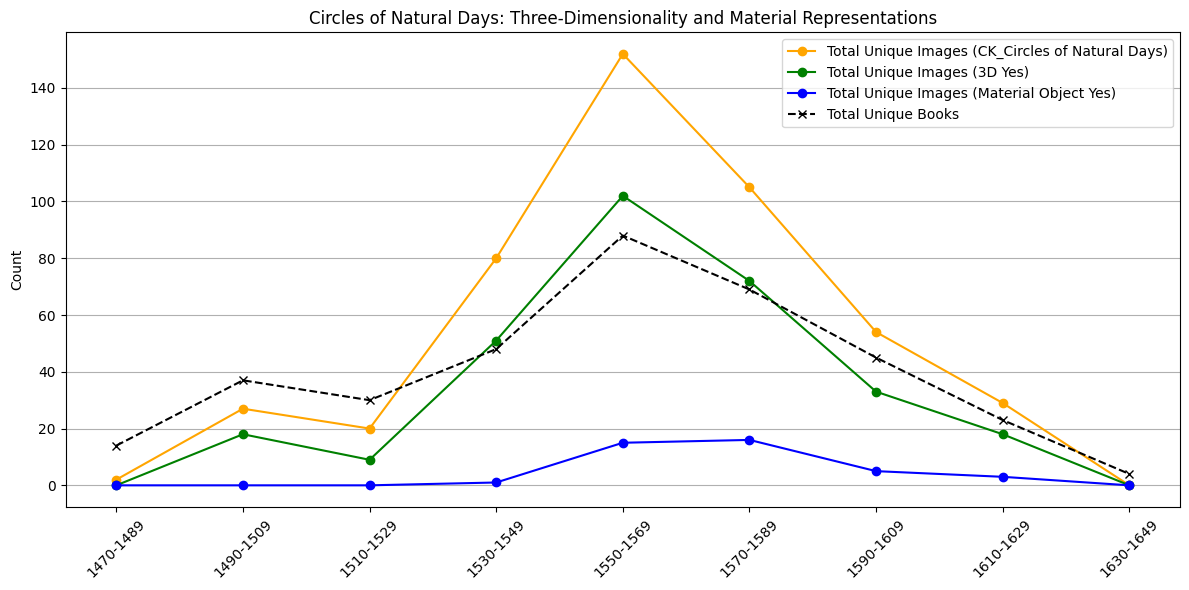

In [49]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Filter for rows with cks value "CK_Circles of Natural Days"
filtered = sun_motion_visual[sun_motion_visual['cks'] == 'CK_Circles of Natural Days']

# Count total unique images per interval
total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with '3D' as 'yes' per interval
total_unique_images_3D_yes_per_interval = filtered[filtered['3D'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique images with 'material object' as 'yes' per interval
total_unique_images_material_yes_per_interval = filtered[filtered['material object'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

# Count total unique books per interval
total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)  # Assuming 'book' is the book name column

# Prepare data for plotting
summary_data = pd.DataFrame({
    'Interval': labels,
    'Total Unique Images (CK_Circles of Natural Days)': total_unique_images_per_interval,
    'Total Unique Images (3D Yes)': total_unique_images_3D_yes_per_interval,
    'Total Unique Images (Material Object Yes)': total_unique_images_material_yes_per_interval,
    'Total Unique Books': total_unique_books_per_interval
})

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (CK_Circles of Natural Days)'], marker='o', linestyle='-', label='Total Unique Images (CK_Circles of Natural Days)', color='orange')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (3D Yes)'], marker='o', linestyle='-', label='Total Unique Images (3D Yes)', color='green')
plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Material Object Yes)'], marker='o', linestyle='-', label='Total Unique Images (Material Object Yes)', color='blue')
plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

# Formatting the plot
plt.ylabel('Count')
plt.title('Circles of Natural Days: Three-Dimensionality and Material Representations')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

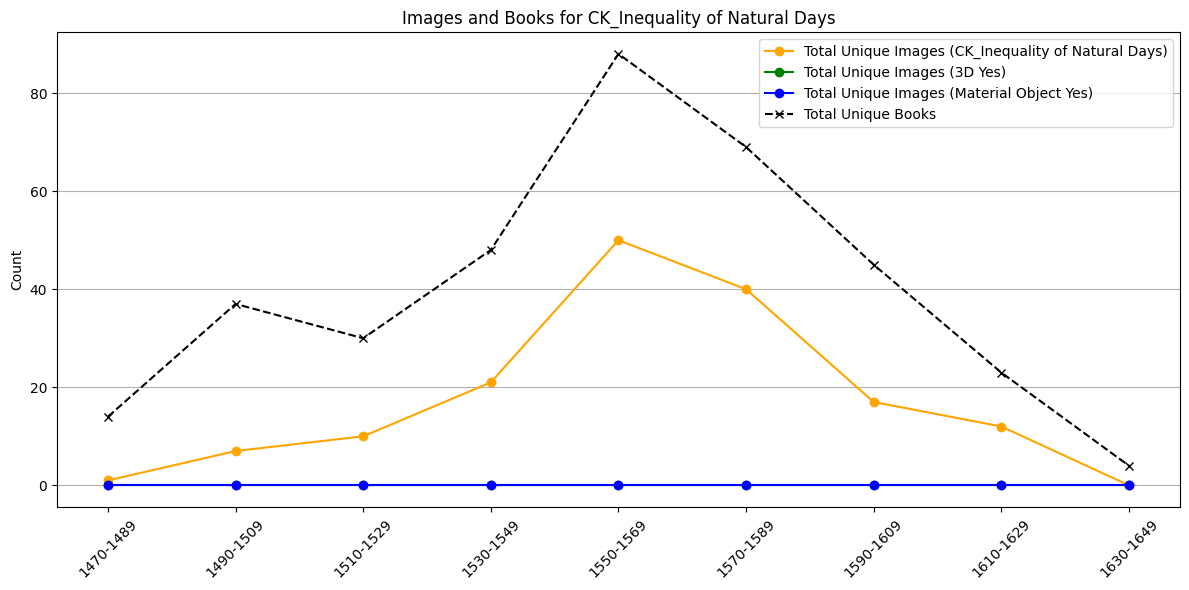

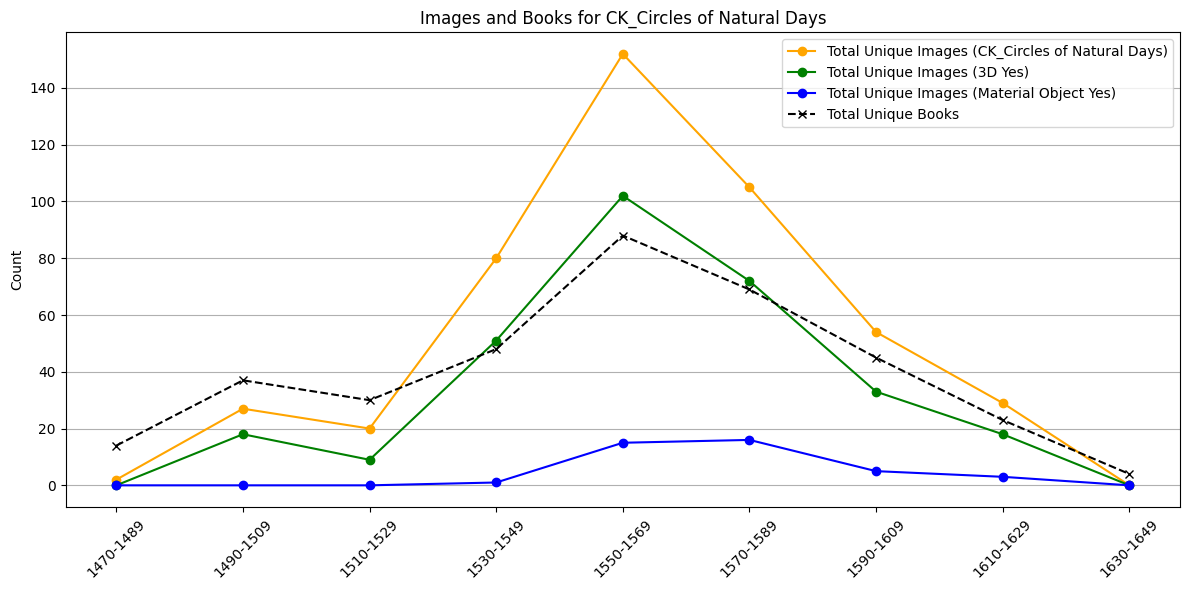

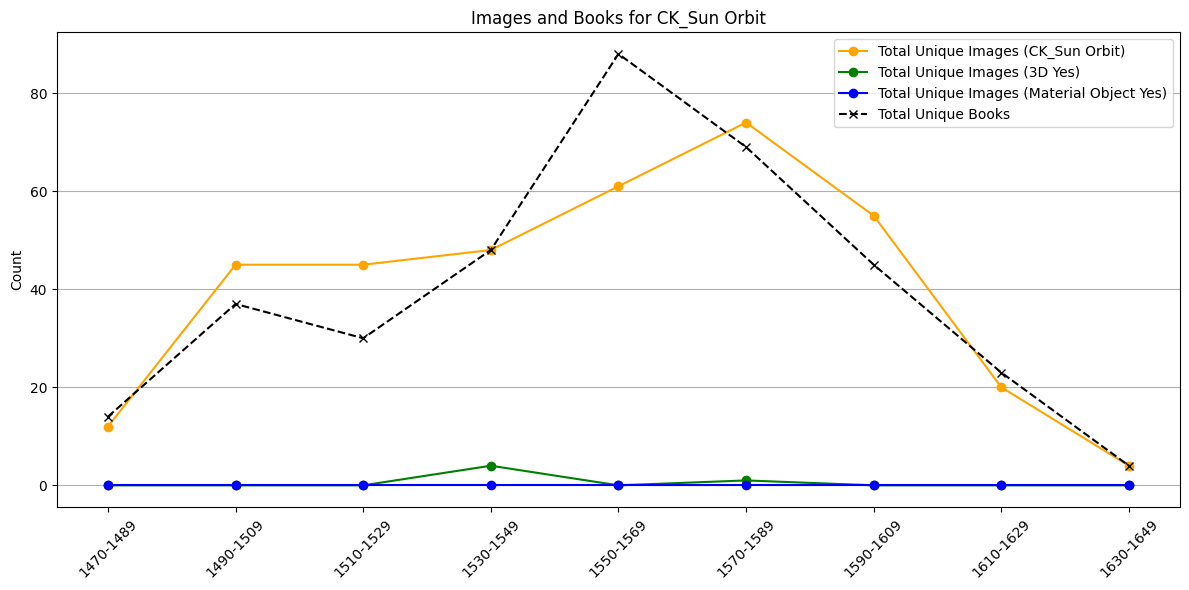

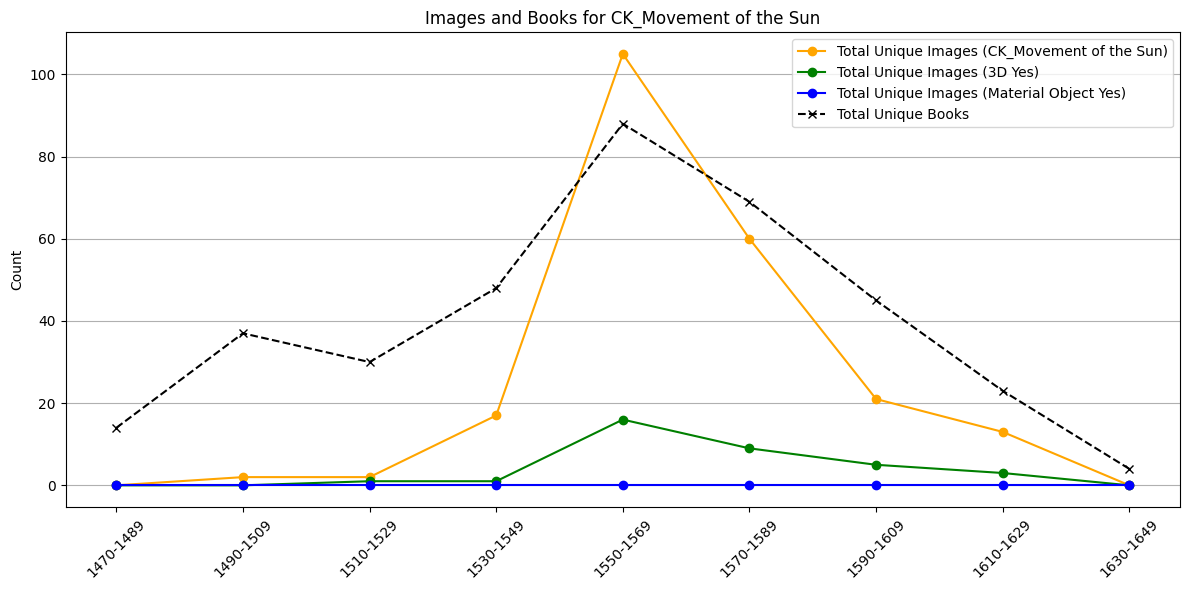

In [50]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to process each keyword
def plot_keyword_data(keyword):
    # Filter for rows with the specified cks value
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    # Count total unique images per interval
    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with '3D' as 'yes' per interval
    total_unique_images_3D_yes_per_interval = filtered[filtered['3D'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'material object' as 'yes' per interval
    total_unique_images_material_yes_per_interval = filtered[filtered['material object'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval,
        'Total Unique Images (3D Yes)': total_unique_images_3D_yes_per_interval,
        'Total Unique Images (Material Object Yes)': total_unique_images_material_yes_per_interval,
        'Total Unique Books': total_unique_books_per_interval
    })

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (3D Yes)'], marker='o', linestyle='-', label='Total Unique Images (3D Yes)', color='green')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Material Object Yes)'], marker='o', linestyle='-', label='Total Unique Images (Material Object Yes)', color='blue')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of keywords
keywords = [
    'CK_Inequality of Natural Days',
    'CK_Circles of Natural Days',
    'CK_Sun Orbit',
    'CK_Movement of the Sun'
]

# Plot data for each keyword
for keyword in keywords:
    plot_keyword_data(keyword)

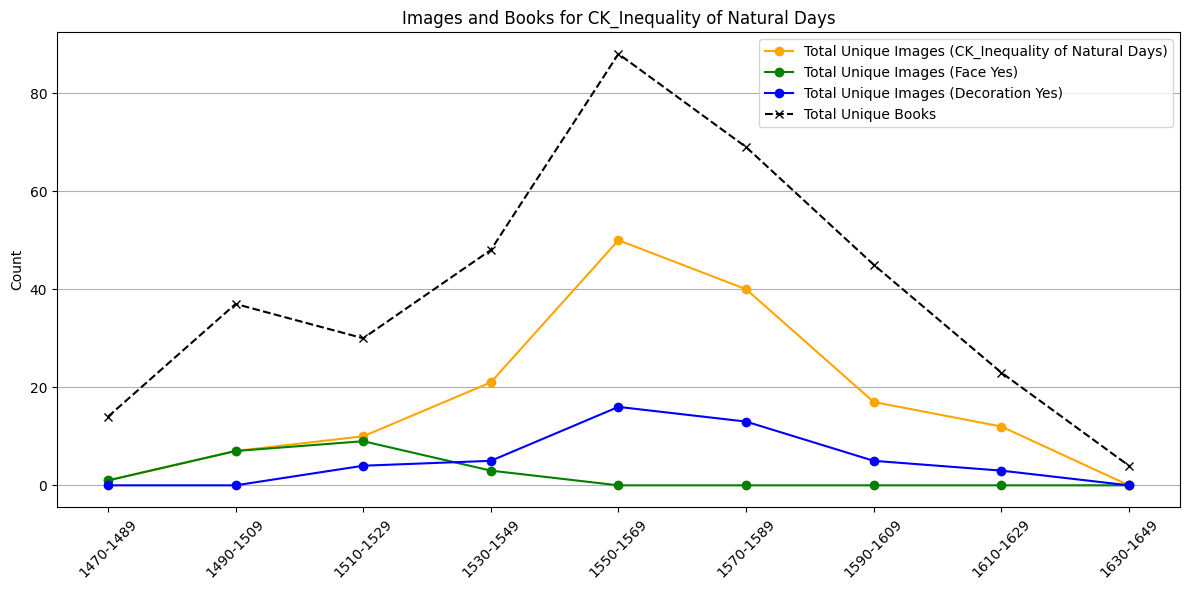

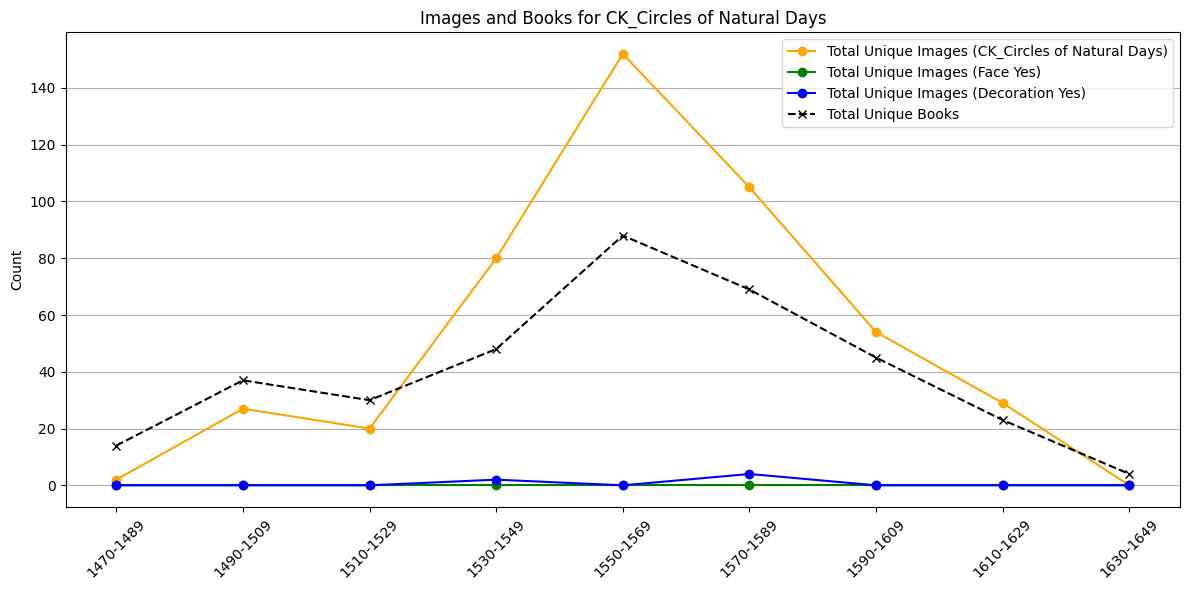

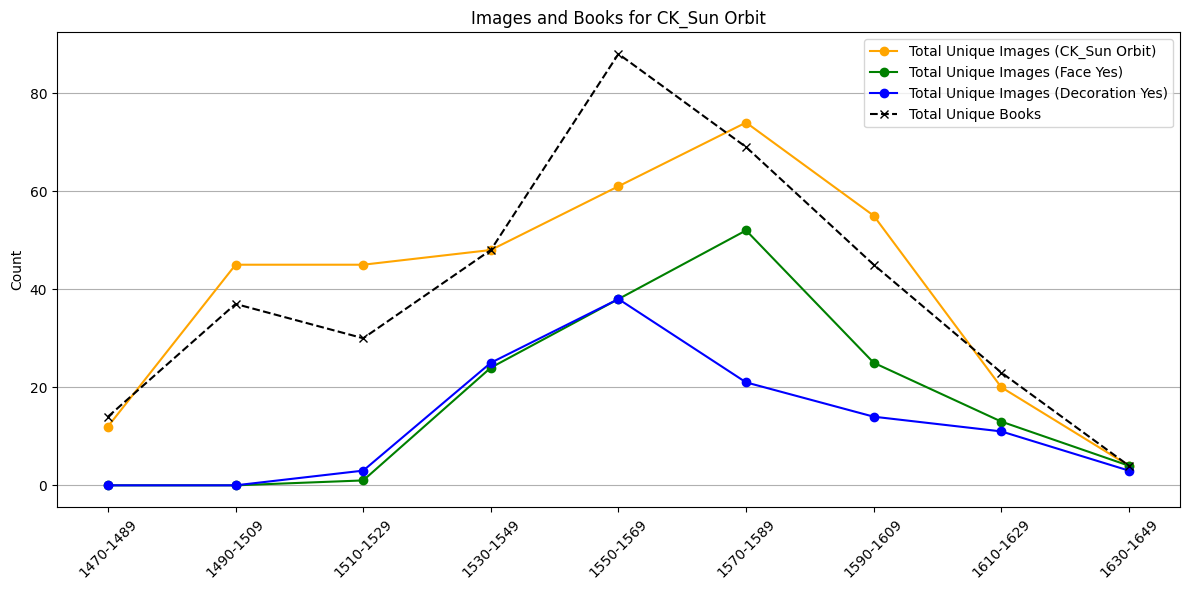

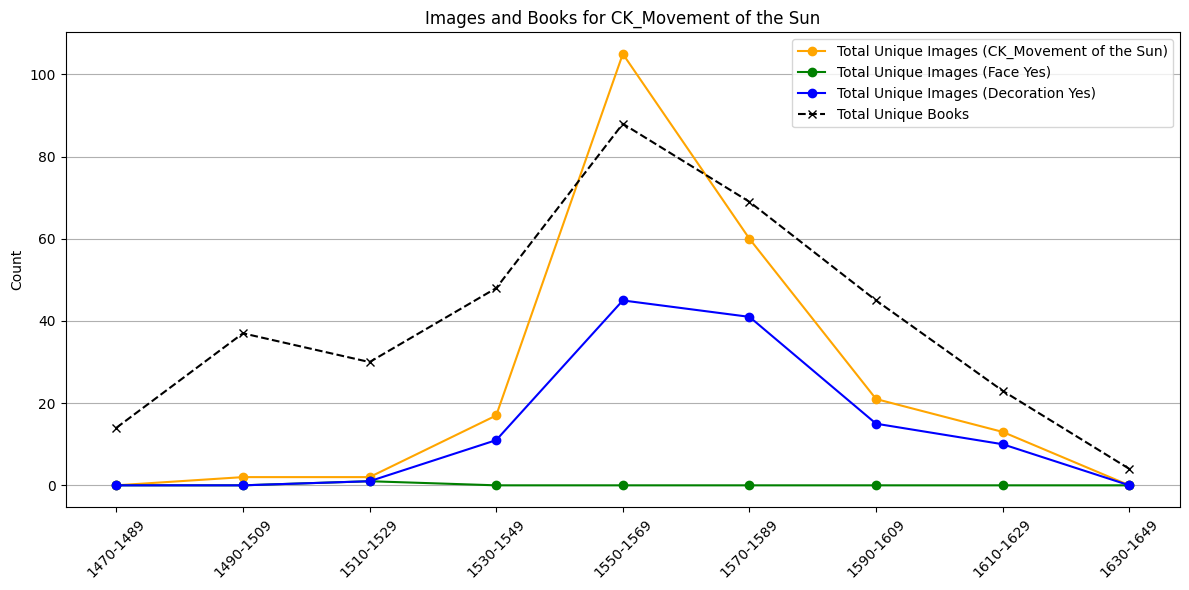

In [51]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to process each keyword
def plot_keyword_data(keyword):
    # Filter for rows with the specified cks value
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    # Count total unique images per interval
    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'face' as 'yes' per interval
    total_unique_images_face_yes_per_interval = filtered[filtered['face'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'decoration' as 'yes' per interval
    total_unique_images_decoration_yes_per_interval = filtered[filtered['decoration'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval,
        'Total Unique Images (Face Yes)': total_unique_images_face_yes_per_interval,
        'Total Unique Images (Decoration Yes)': total_unique_images_decoration_yes_per_interval,
        'Total Unique Books': total_unique_books_per_interval
    })

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Face Yes)'], marker='o', linestyle='-', label='Total Unique Images (Face Yes)', color='green')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Decoration Yes)'], marker='o', linestyle='-', label='Total Unique Images (Decoration Yes)', color='blue')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of keywords
keywords = [
    'CK_Inequality of Natural Days',
    'CK_Circles of Natural Days',
    'CK_Sun Orbit',
    'CK_Movement of the Sun'
]

# Plot data for each keyword
for keyword in keywords:
    plot_keyword_data(keyword)

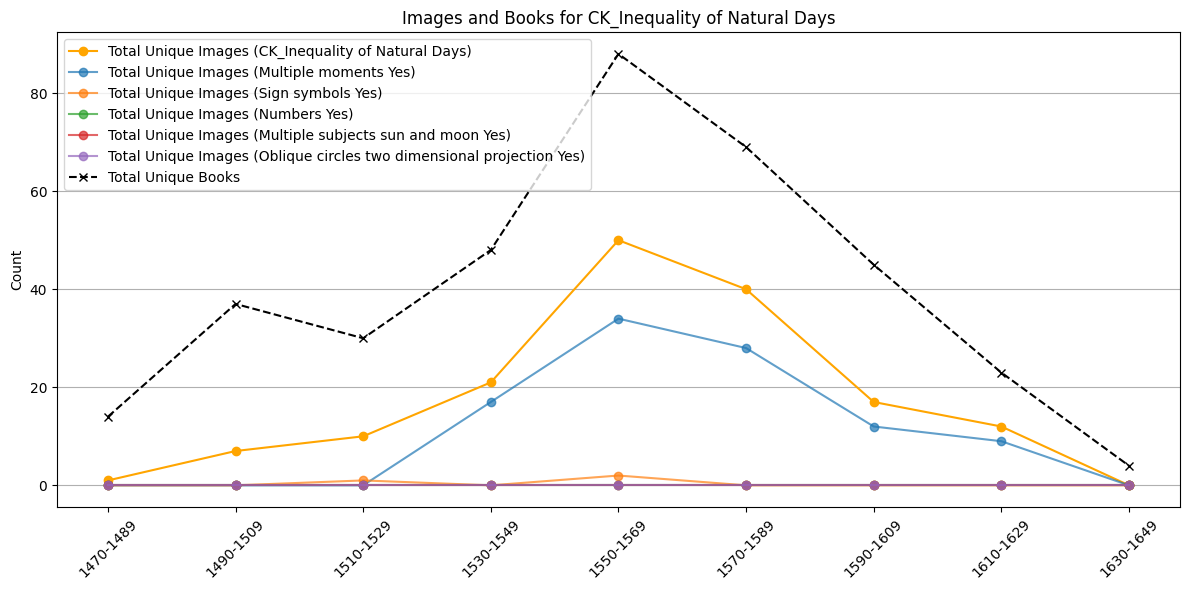

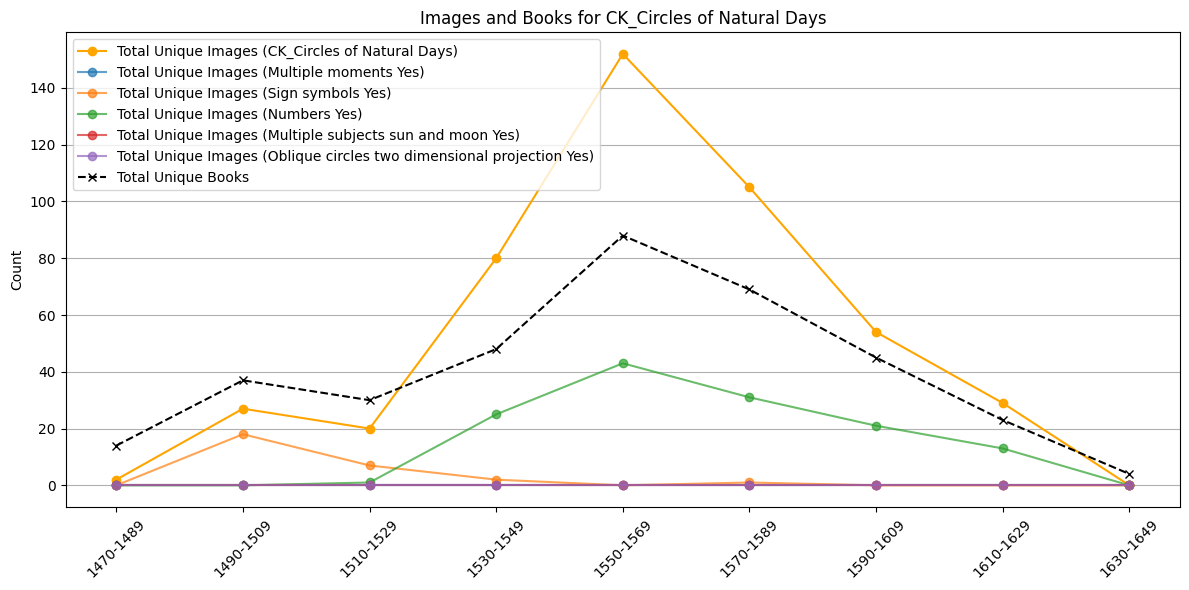

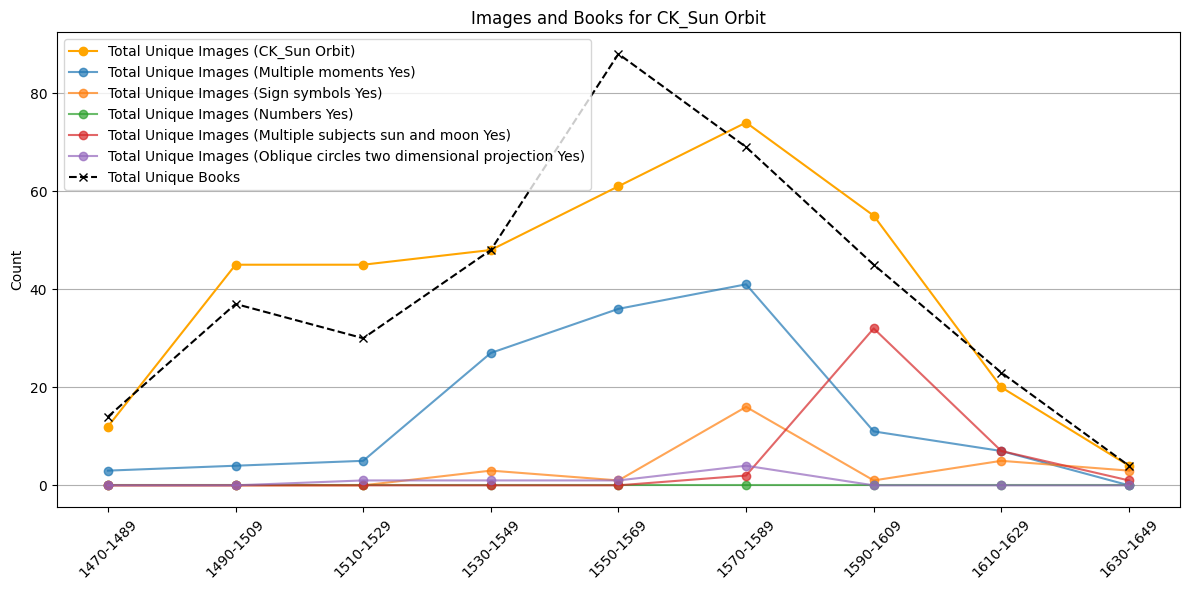

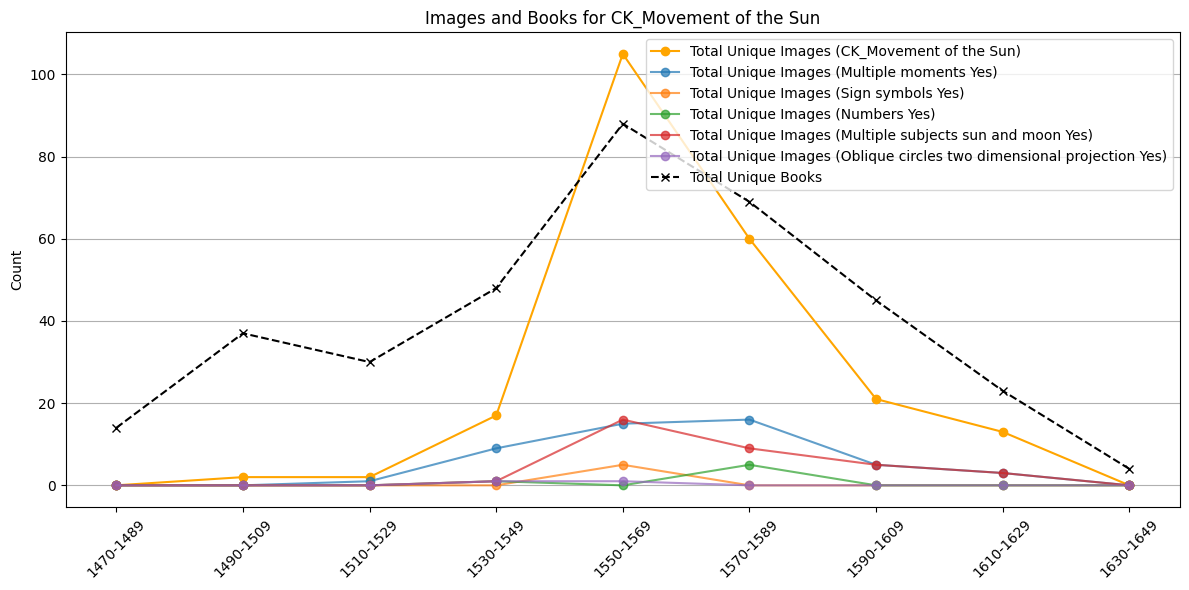

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames (replace with your actual DataFrames)
# sun_motion_visual = pd.DataFrame(...)
# books = pd.DataFrame(...)

# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to process each keyword
def plot_keyword_data(keyword):
    # Filter for rows with the specified cks value
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    # Count total unique images per interval
    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Define the columns to check for 'yes' values
    columns_to_check = [
        'multiple moments',
        'sign symbols',
        'numbers',
        'multiple subjects sun and moon',
        'oblique circles two dimensional projection'
    ]

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval
    })

    # Count unique images for each specified column
    for column in columns_to_check:
        total_unique_images_yes_per_interval = filtered[filtered[column] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)
        summary_data[f'Total Unique Images ({column.capitalize()} Yes)'] = total_unique_images_yes_per_interval

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    
    # Plot for each of the specified attributes
    for column in columns_to_check:
        plt.plot(summary_data['Interval'], summary_data[f'Total Unique Images ({column.capitalize()} Yes)'], marker='o', linestyle='-', label=f'Total Unique Images ({column.capitalize()} Yes)', alpha=0.7)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)
    summary_data['Total Unique Books'] = total_unique_books_per_interval
    
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# List of keywords
keywords = [
    'CK_Inequality of Natural Days',
    'CK_Circles of Natural Days',
    'CK_Sun Orbit',
    'CK_Movement of the Sun'
]

# Plot data for each keyword
for keyword in keywords:
    plot_keyword_data(keyword)


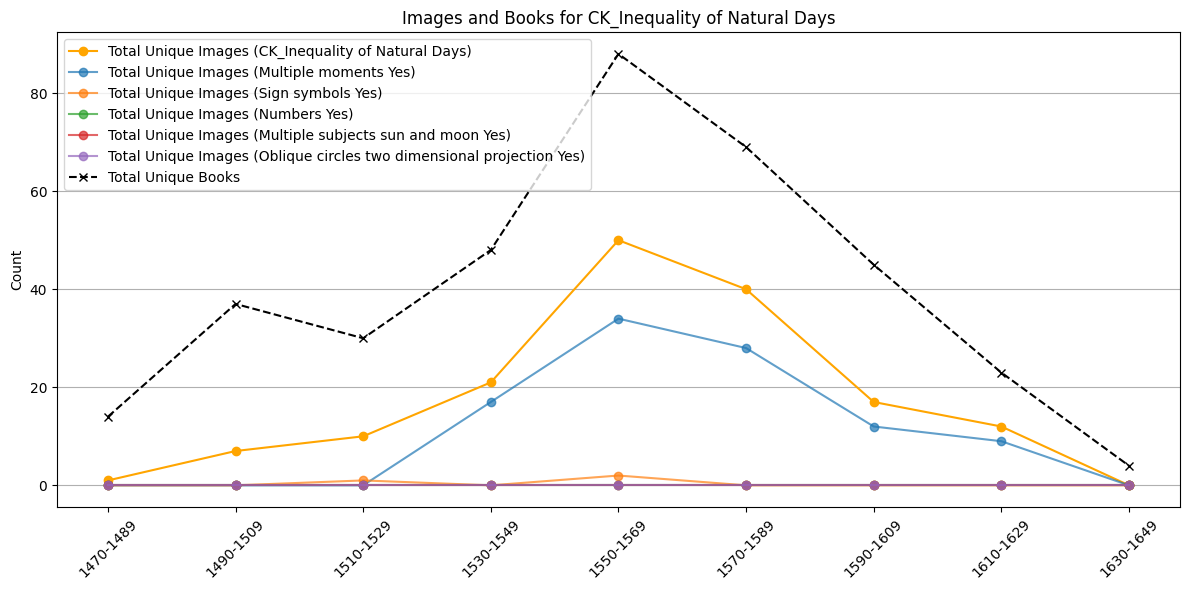

In [54]:

# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to plot data for CK_Inequality of Natural Days
def plot_inequality_of_natural_days():
    keyword = 'CK_Inequality of Natural Days'
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    columns_to_check = [
        'multiple moments',
        'sign symbols',
        'numbers',
        'multiple subjects sun and moon',
        'oblique circles two dimensional projection'
    ]

    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval
    })

    for column in columns_to_check:
        total_unique_images_yes_per_interval = filtered[filtered[column] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)
        summary_data[f'Total Unique Images ({column.capitalize()} Yes)'] = total_unique_images_yes_per_interval

    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')

    for column in columns_to_check:
        plt.plot(summary_data['Interval'], summary_data[f'Total Unique Images ({column.capitalize()} Yes)'], marker='o', linestyle='-', label=f'Total Unique Images ({column.capitalize()} Yes)', alpha=0.7)

    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)
    summary_data['Total Unique Books'] = total_unique_books_per_interval

    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')

    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for CK_Inequality of Natural Days
plot_inequality_of_natural_days()

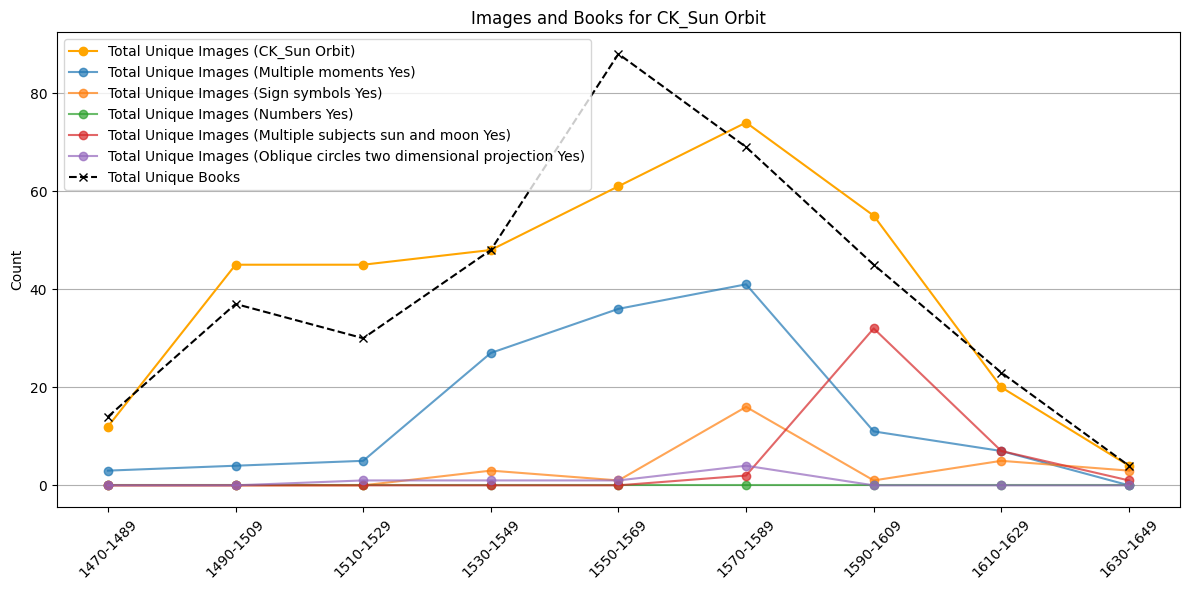

In [55]:
# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to plot data for CK_Sun Orbit
def plot_sun_orbit():
    keyword = 'CK_Sun Orbit'
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    columns_to_check = [
        'multiple moments',
        'sign symbols',
        'numbers',
        'multiple subjects sun and moon',
        'oblique circles two dimensional projection'
    ]

    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval
    })

    for column in columns_to_check:
        total_unique_images_yes_per_interval = filtered[filtered[column] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)
        summary_data[f'Total Unique Images ({column.capitalize()} Yes)'] = total_unique_images_yes_per_interval

    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')

    for column in columns_to_check:
        plt.plot(summary_data['Interval'], summary_data[f'Total Unique Images ({column.capitalize()} Yes)'], marker='o', linestyle='-', label=f'Total Unique Images ({column.capitalize()} Yes)', alpha=0.7)

    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)
    summary_data['Total Unique Books'] = total_unique_books_per_interval

    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')

    plt.ylabel('Count')
    plt.title(f'Images and Books for {keyword}')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for CK_Sun Orbit
plot_sun_orbit()

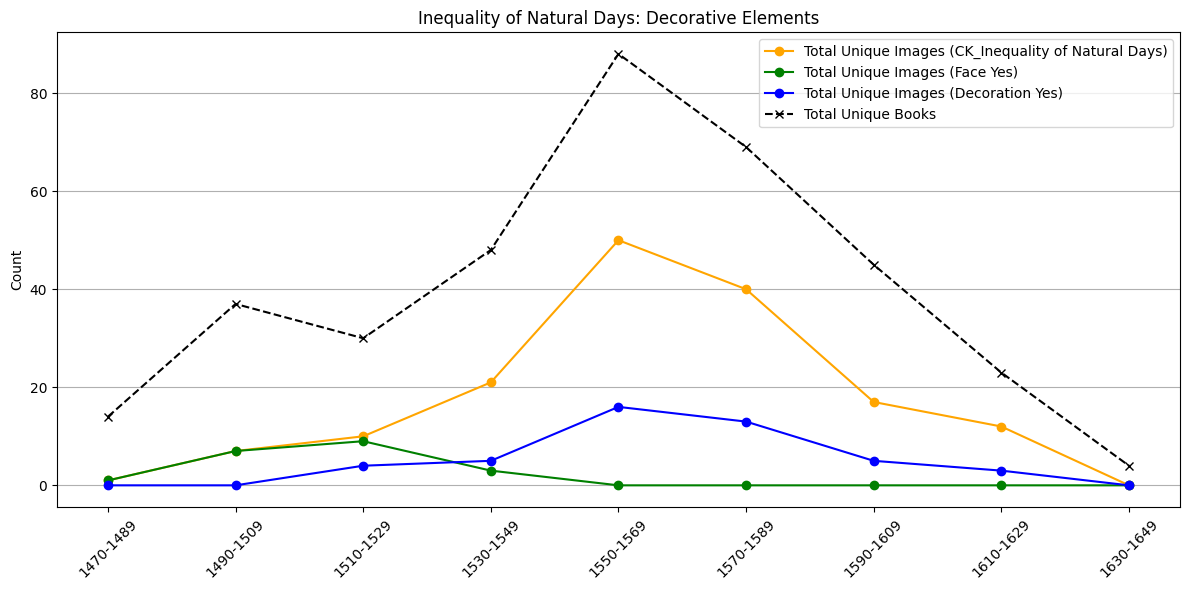

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames (replace with your actual DataFrames)
# sun_motion_visual = pd.DataFrame(...)
# books = pd.DataFrame(...)

# Convert 'year' to int
sun_motion_visual['year'] = sun_motion_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
sun_motion_visual['interval'] = pd.cut(sun_motion_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to plot data for CK_Inequality of Natural Days
def plot_inequality_of_natural_days():
    keyword = 'CK_Inequality of Natural Days'
    filtered = sun_motion_visual[sun_motion_visual['cks'] == keyword]

    total_unique_images_per_interval = filtered.groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'face' as 'yes' per interval
    total_unique_images_face_yes_per_interval = filtered[filtered['face'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique images with 'decoration' as 'yes' per interval
    total_unique_images_decoration_yes_per_interval = filtered[filtered['decoration'] == 'yes'].groupby('interval', observed=True)['images'].nunique().reindex(labels, fill_value=0)

    # Count total unique books per interval
    total_unique_books_per_interval = books.groupby('interval', observed=True)['book'].nunique().reindex(labels, fill_value=0)

    # Prepare data for plotting
    summary_data = pd.DataFrame({
        'Interval': labels,
        'Total Unique Images': total_unique_images_per_interval,
        'Total Unique Images (Face Yes)': total_unique_images_face_yes_per_interval,
        'Total Unique Images (Decoration Yes)': total_unique_images_decoration_yes_per_interval,
        'Total Unique Books': total_unique_books_per_interval
    })

    # Create a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images'], marker='o', linestyle='-', label=f'Total Unique Images ({keyword})', color='orange')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Face Yes)'], marker='o', linestyle='-', label='Total Unique Images (Face Yes)', color='green')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Images (Decoration Yes)'], marker='o', linestyle='-', label='Total Unique Images (Decoration Yes)', color='blue')
    plt.plot(summary_data['Interval'], summary_data['Total Unique Books'], marker='x', linestyle='--', color='black', label='Total Unique Books')  # Reference line

    # Formatting the plot
    plt.ylabel('Count')
    plt.title('Inequality of Natural Days: Decorative Elements')
    plt.legend()
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function for CK_Inequality of Natural Days
plot_inequality_of_natural_days()
